### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

Variable Name	Description

Carat	  Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the worst and J the best.

Clarity	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.

In [3]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [4]:
data1=pd.read_csv("cubic_zirconia.csv")
data1

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [5]:
data_df=data1

## Q1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [6]:
#We have dropped the Unnamed: 0 colum as it is of no use of it.
data_df=data_df.drop(['Unnamed: 0'],axis=1)

In [7]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
data_df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [10]:
data_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [11]:
print("Number of rows: ",data_df.shape[0], "\n""Number. of columns: ",data_df.shape[1])

Number of rows:  26967 
Number. of columns:  10


In [12]:
#The Dataset is having total 697 missing values in colum depth
data_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
data_df[data_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [14]:
# Percentage of missing values
# As in any column if having missing value more than 5 % than using mean or median can impact the performance of the model.
#So Here we can replace it by mean or median.
# If the missing value in any column is above 5% ,for that specific column we can use KNN Imputer.
# KNN IMPUTER- This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.
100 * data_df.isnull().sum() / len(data_df)

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

In [15]:
### Imputing missing values
for column in data_df.columns:
    if data_df[column].dtype != 'object':
        median = data_df[column].median()
        data_df[column] = data_df[column].fillna(median)    
        
data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
data_df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.394509,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


1. Around 50 percent of cubic zirconia carat weight has the same length and width around 5.6 to 5.7 
2. Among length,width and height  zirconia has the highest of width around 58.9 mm as compared to length and height.
3. Most of the 50 percent of the cubic zirconia has the price of nearly 2375.
4. The highest weight of cubic zirconia is of 4.5 and least is of  0.2
5. Carat ranges from 0.2 to 4.5 of the cubic zircoia with the price range starting from 326 to 18818.
6. With the increase of depth, the table size is also increasing of cubic zirconia.


In [17]:
data_df.describe(include='object')

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [18]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [19]:
#So dropping duplicate values
data_df.drop_duplicates(inplace=True)

In [20]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [21]:
print("Number of rows: ",data_df.shape[0], "\n""Number. of columns: ",data_df.shape[1])

Number of rows:  26933 
Number. of columns:  10


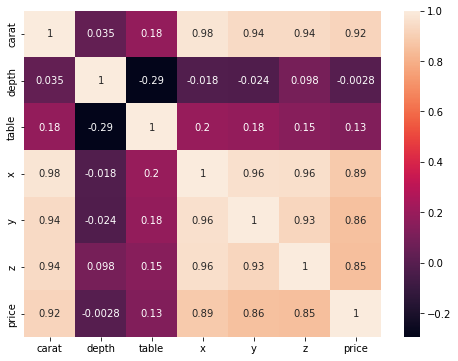

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data_df.corr(),annot=True)
plt.show()

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. It also tell us about the correlation between the variables.

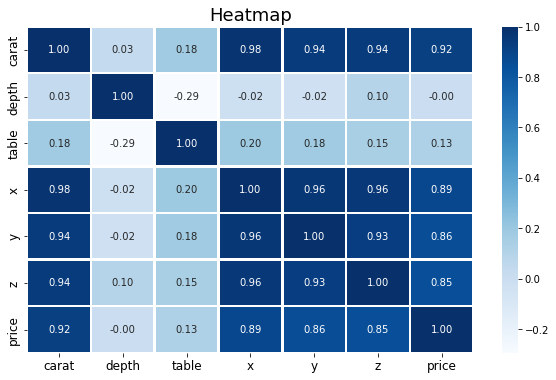

In [23]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(data_df.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);
plt.title('Heatmap',fontsize = 18);

#### From the above graph we can also see the corelation between X(independents variables) and Y(dependent variable) . The highest coorelation is between carat and price which is of 92 percent. Its a significant relationship.

#### From the Heatmap Graph we can observed that cart and X is highly co-related with each other and least corelated are Table and depth with each other.

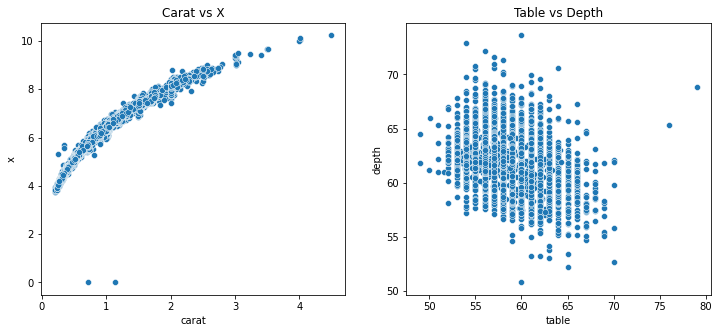

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Carat vs X')
sns.scatterplot(x="carat",y="x",data=data_df)
plt.subplot(1,2,2)
plt.title('Table vs Depth')
sns.scatterplot(x="table",y="depth",data=data_df);

In [25]:
## unique values for categorical variables
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',data_df[column].nunique())
        print(data_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [26]:
from pandas_profiling import ProfileReport
report =ProfileReport(data_df)
report.to_file('pandasprofile.html')

### Data Visualization
#### Univariate Analysis

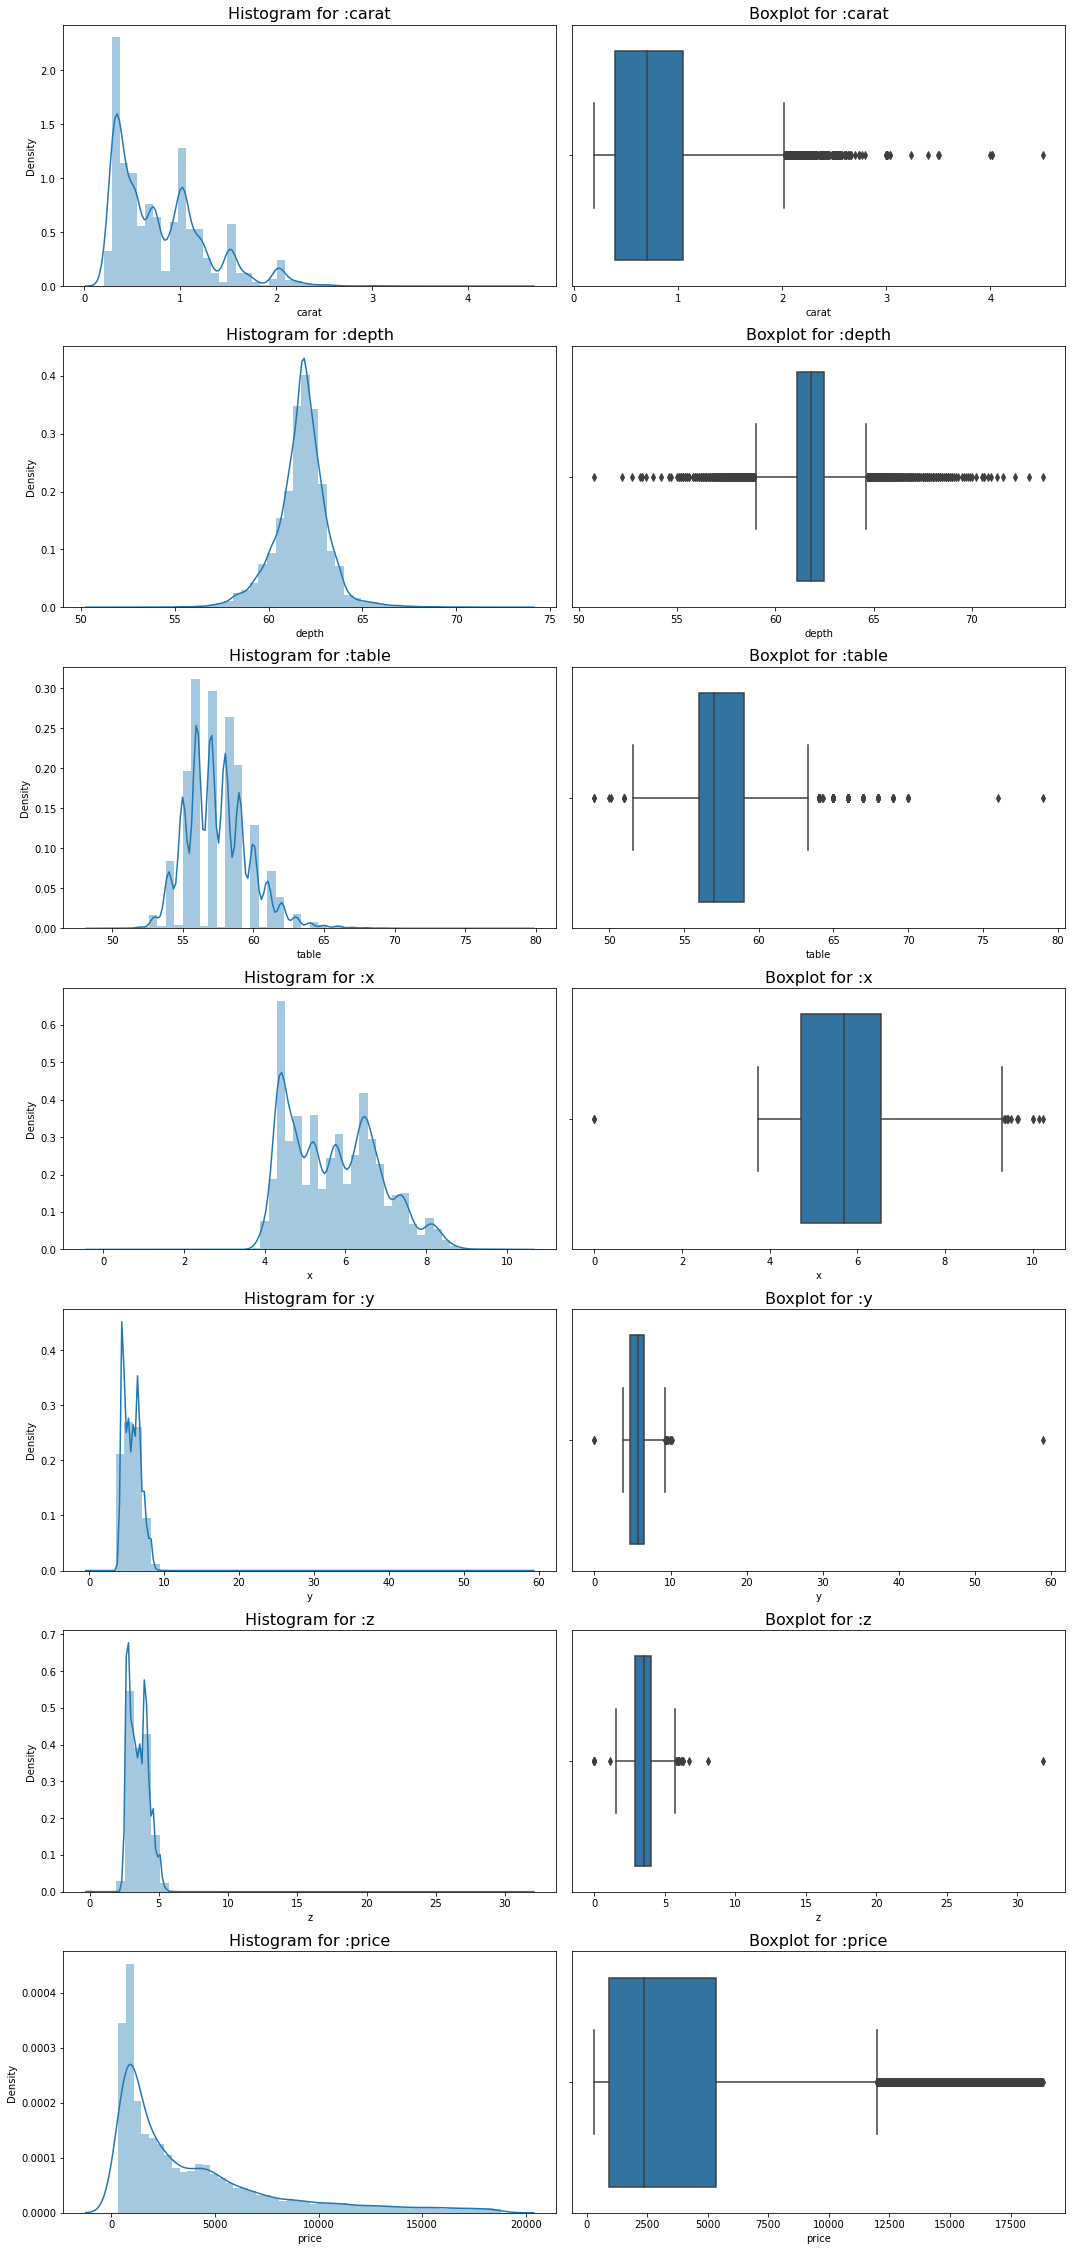

In [27]:
a=1
plt.figure(figsize=(15,80))
for i in data_df.columns :
    if data_df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(data_df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(data_df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

In [28]:
print("Skewness values"'\n',data_df.skew())

Skewness values
 carat    1.114789
depth   -0.029475
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64


#### Visulization of Categorical Variables

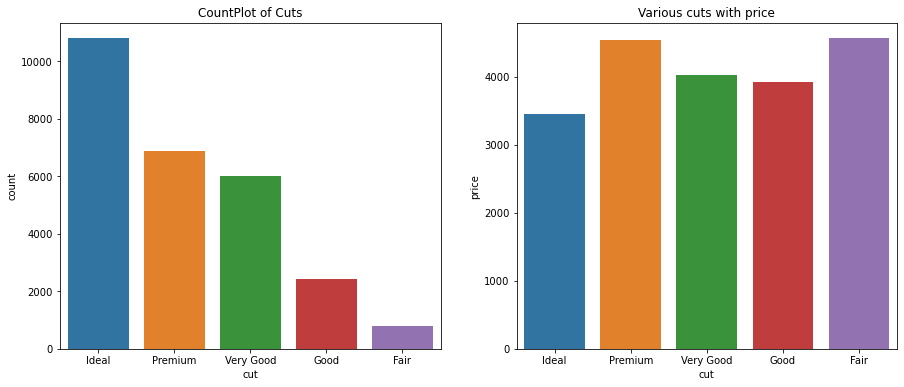

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['cut'])
plt.title("CountPlot of Cuts")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["cut"],ci=False)
plt.title("Various cuts with price");

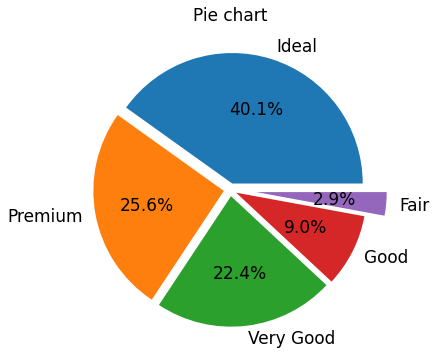

In [30]:
plt.figure(figsize=(6,6))
plt.pie(data_df['cut'].value_counts(),labels=data_df['cut'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)

plt.show();

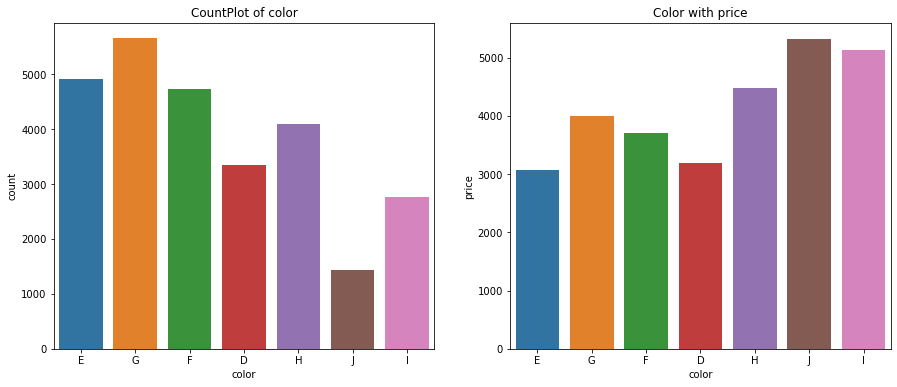

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['color'])
plt.title("CountPlot of color")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["color"],ci=False)
plt.title("Color with price");

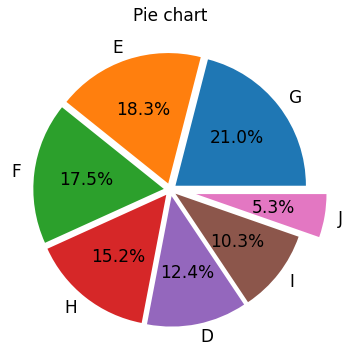

In [32]:
plt.figure(figsize=(6,6))
plt.pie(data_df['color'].value_counts(),labels=data_df['color'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)
plt.show();

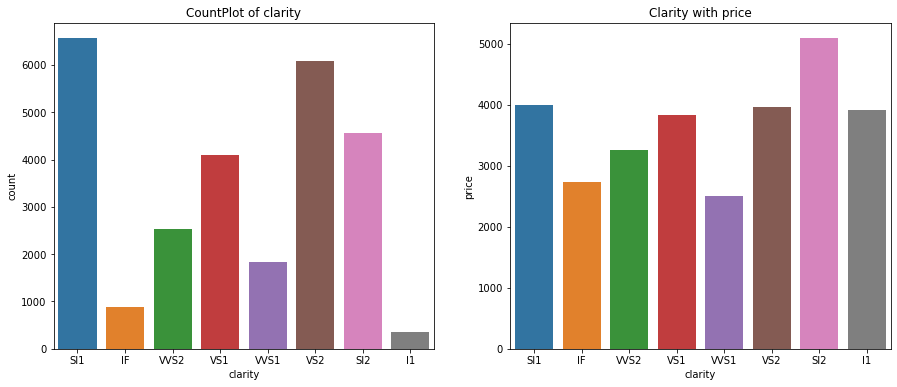

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['clarity'])
plt.title("CountPlot of clarity")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["clarity"],ci=False)
plt.title("Clarity with price");

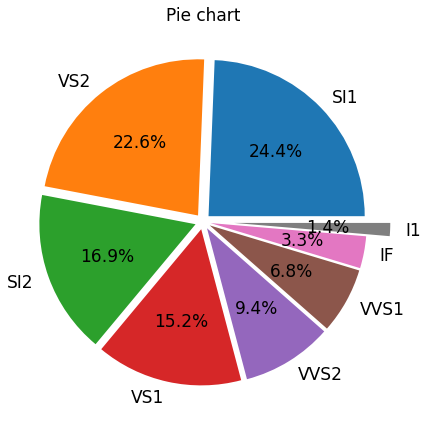

In [34]:
plt.figure(figsize=(6,6))
plt.pie(data_df['clarity'].value_counts(),labels=data_df['clarity'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)
plt.tight_layout()

#### Multi-variate Analysis
In the below plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

<Figure size 432x288 with 0 Axes>

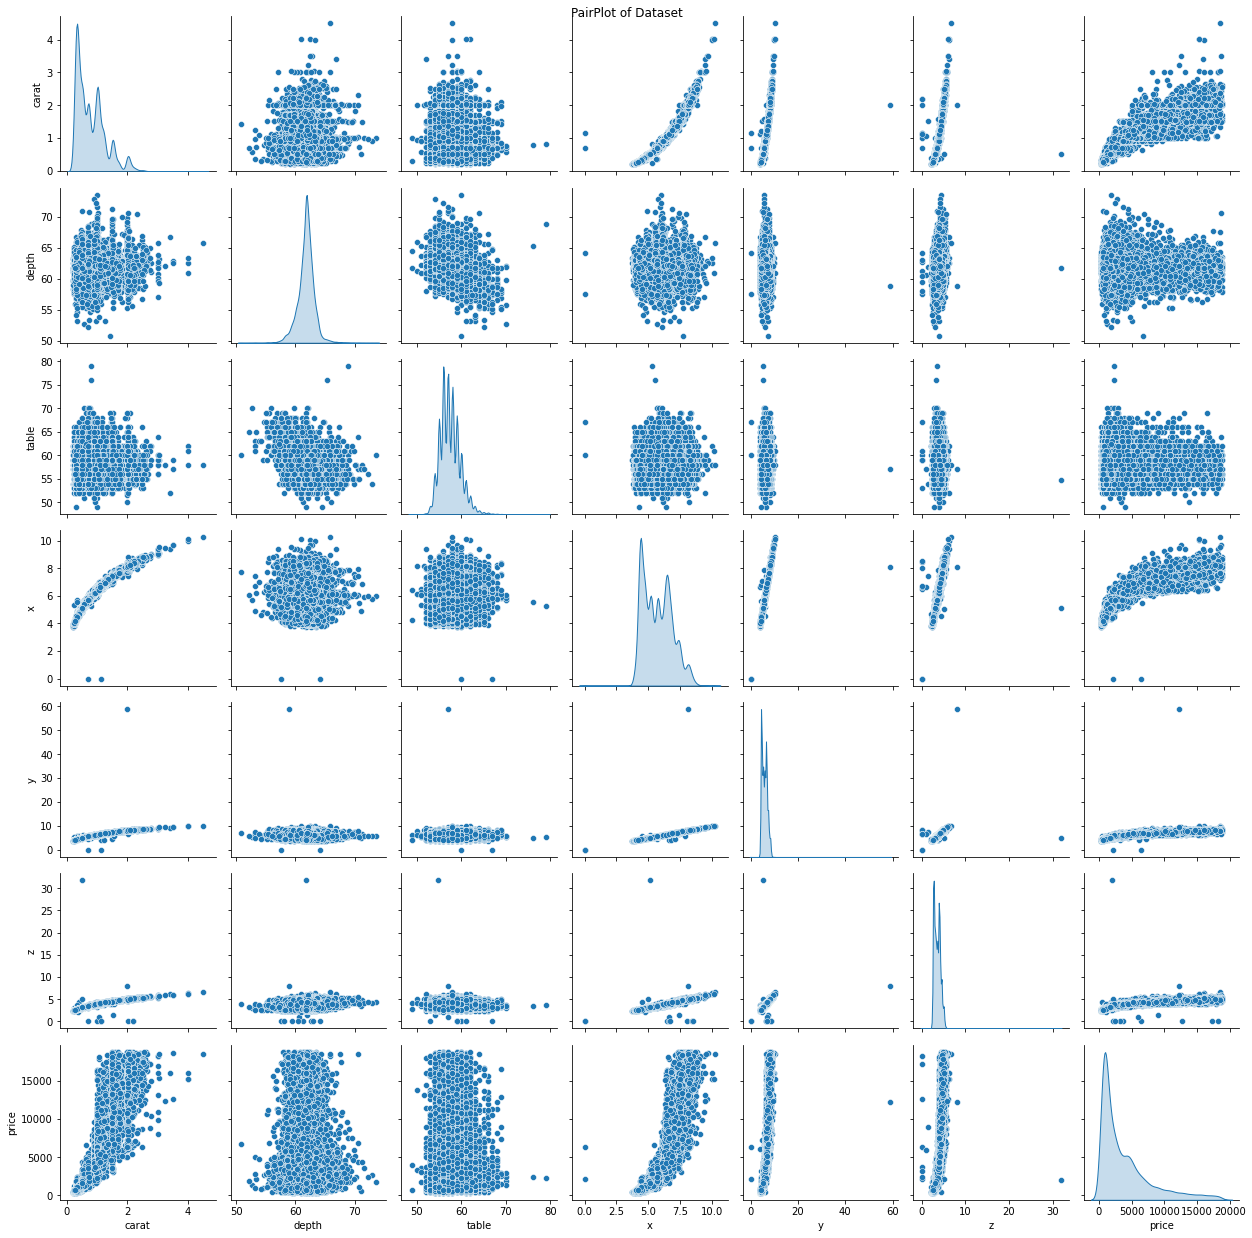

In [35]:
plt.tight_layout()
pairplot = sns.pairplot(data_df,diag_kind='kde')
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout()

###  Q1.2	Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [36]:
data_df[data_df.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

In [37]:
data_df.loc[((data_df['x'] == 0) | (data_df['y'] == 0) | (data_df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible.Any thing which is solid in nature alwasy have length,width and height. So we have to filter out those as it clearly faulty data entries. 

In [38]:
data_df.shape

(26933, 10)

In [39]:
data_df.drop(data_df[((data_df['x'] == 0) | (data_df['y'] == 0) | (data_df['z'] == 0))].index, inplace=True)

In [40]:
data_df[data_df.isin([0])].stack(0)

Series([], dtype: object)

In [41]:
data_df.shape

(26925, 10)

In [42]:
print("Number of rows: ",data_df.shape[0], "\n""Number. of columns: ",data_df.shape[1])

Number of rows:  26925 
Number. of columns:  10


In [43]:
data_df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [44]:
data_df['clarity'].value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [45]:
data_df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [46]:
data_df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

Here 3 ordinal variables are present in the dataset which Clarity, Color and Cut.
1. Cut has 5 sub-levels which are ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'] as from the percentage they all posses diffrent weightage or diffrent percentage values of information. And Names of the sub levels are also differ from each other.So merging or combining of sub levels doest make any sense.
2. Color has 7 sub-levels which are ['E', 'G', 'F', 'D', 'H', 'J', 'I'] as from the percentage they all posses different weightage or diffrent percentage values of information. And Names of the sub levels are also differ from each other.So merging or combining of sub levels doest make any sense.
3. Clarity has 8 sub-levels which are ['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'] as from the percentage they all posses different weightage or diffrent percentage values of information. And Names of the sub levels are also diffre from each other.So merging or combining of sub levels doest make any sense.

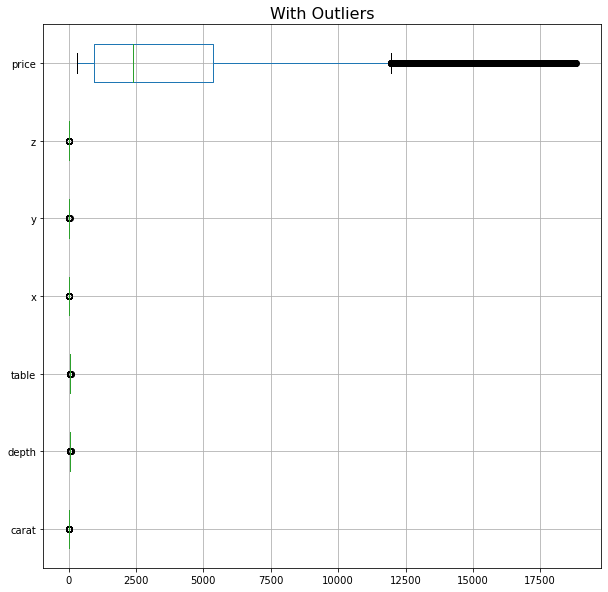

In [47]:
# construct box plot for continuous variables
cont=data_df.dtypes.index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

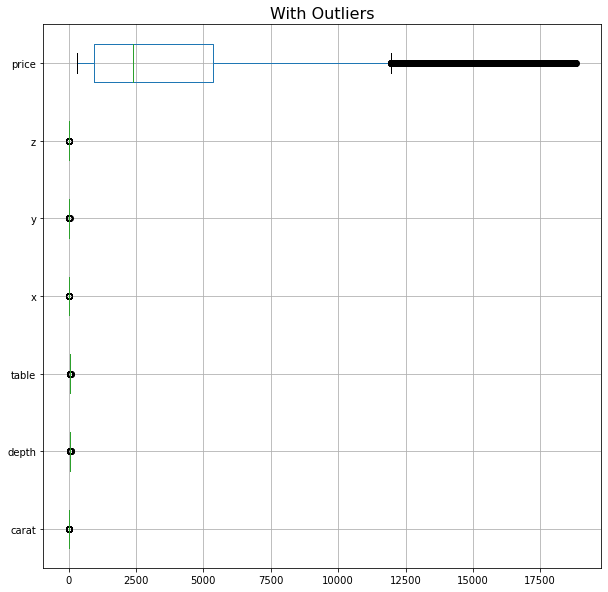

In [48]:
# construct box plot for continuous variables
cont=data_df.dtypes[(data_df.dtypes!='uint8') & (data_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

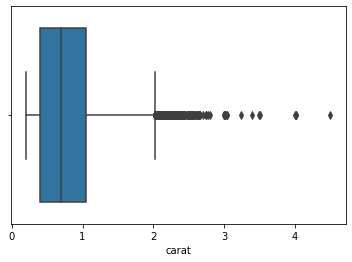

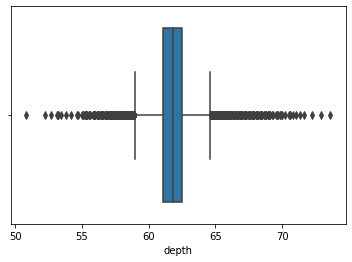

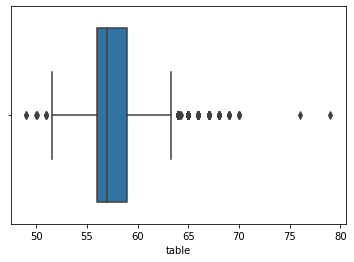

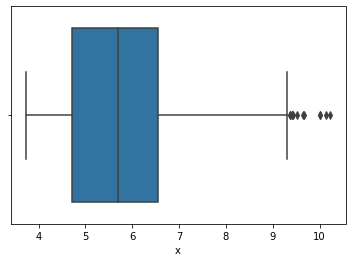

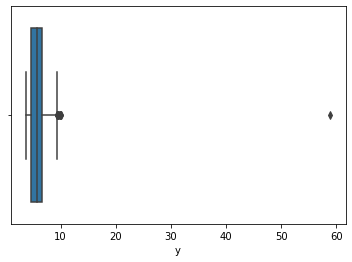

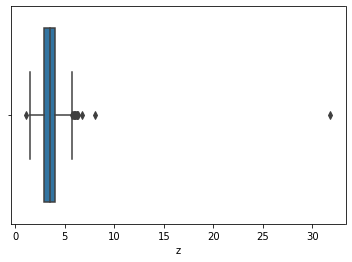

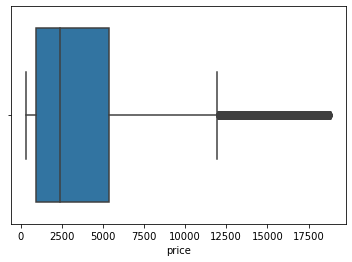

In [49]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(data_df[i],whis=1.5)
    plt.show();

In [50]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [51]:
for column in data_df[cols].columns:
    lr,ur=remove_outlier(data_df[column])
    data_df[column]=np.where(data_df[column]>ur,ur,data_df[column])
    data_df[column]=np.where(data_df[column]<lr,lr,data_df[column])

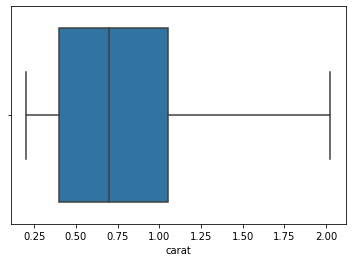

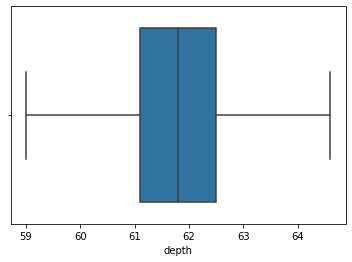

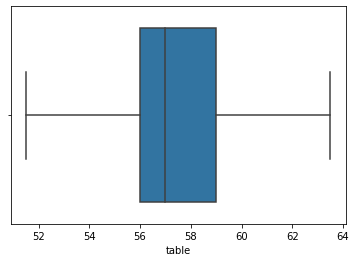

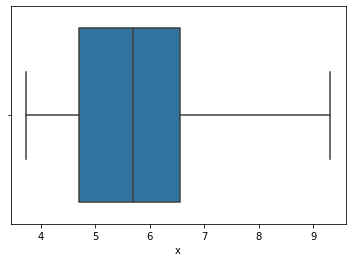

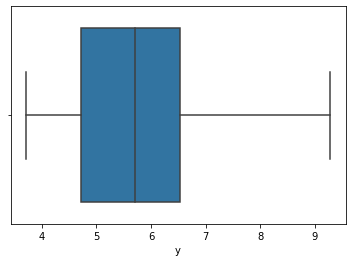

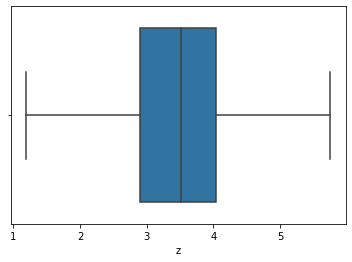

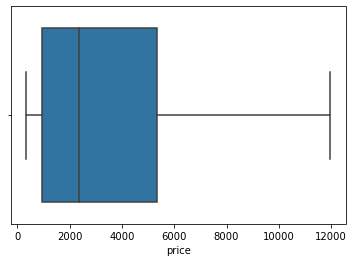

In [52]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(data_df[i],whis=1.5)
    plt.show();

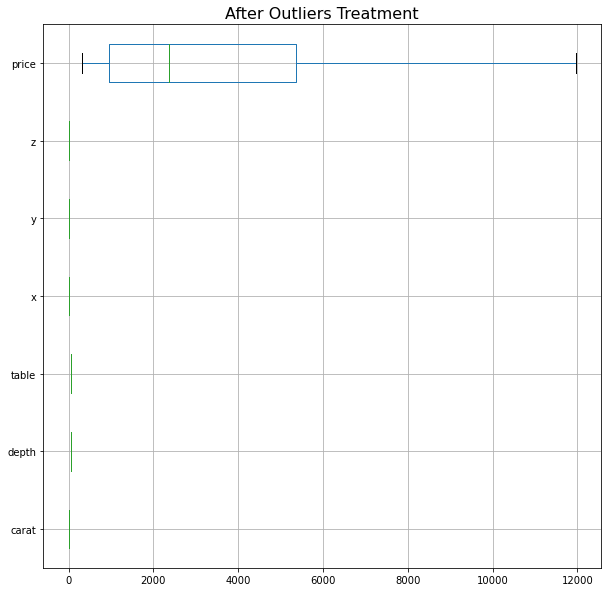

In [53]:
cont=data_df.dtypes[(data_df.dtypes!='uint8') & (data_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
data_df[cont].boxplot(vert=0)
plt.title('After Outliers Treatment',fontsize=16)
plt.show()

In [54]:
print('cut\n',data_df.cut.value_counts())
print('\n')
print('color\n',data_df.color.value_counts())
print('\n')
print('clarity\n',data_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [55]:
data_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [56]:
daa=data_df

In [57]:
### Converting categorical to dummy variables in data
data = pd.get_dummies(daa, columns=['cut','color','clarity'],drop_first=True)
data.head().T

,0,1,2,3,4
carat,0.30,0.33,0.90,0.42,0.31
depth,62.10,60.80,62.20,61.60,60.40
table,58.00,58.00,60.00,56.00,59.00
x,4.27,4.42,6.04,4.82,4.35
y,4.29,4.46,6.12,4.80,4.43
z,2.66,2.70,3.78,2.96,2.65
price,499.00,984.00,6289.00,1082.00,779.00
cut_Good,0.00,0.00,0.00,0.00,0.00
cut_Ideal,1.00,0.00,0.00,1.00,1.00
cut_Premium,0.00,1.00,0.00,0.00,0.00


In [58]:
data.shape

(26925, 24)

In [59]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.793119,0.461998,0.20,0.40,0.70,1.05,2.025
depth,26925.0,61.750656,1.218242,59.00,61.10,61.80,62.50,64.600
table,26925.0,57.435023,2.156704,51.50,56.00,57.00,59.00,63.500
x,26925.0,5.729217,1.125500,3.73,4.71,5.69,6.55,9.310
y,26925.0,5.731159,1.117494,3.71,4.71,5.70,6.54,9.285
z,26925.0,3.537625,0.695681,1.19,2.90,3.52,4.04,5.750
price,26925.0,3734.453965,3466.394724,326.00,945.00,2373.00,5353.00,11965.000
cut_Good,26925.0,0.090399,0.286758,0.00,0.00,0.00,0.00,1.000
cut_Ideal,26925.0,0.401300,0.490171,0.00,0.00,0.00,1.00,1.000
cut_Premium,26925.0,0.255525,0.436164,0.00,0.00,0.00,1.00,1.000


In [60]:
data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [61]:
optimes_variables= data
data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
optimes_variables.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [63]:
optimes_variables["verygood_premium"] = optimes_variables["cut_Premium"] + optimes_variables["cut_Very Good"]
optimes_variables["color_E_F"] = optimes_variables["color_E"] + optimes_variables["color_F"]
optimes_variables["clarity_SI1_VS2"] = optimes_variables["clarity_SI1"] + optimes_variables["clarity_VS2"]

In [64]:
optimes_variables.drop(["cut_Premium","cut_Very Good","color_E","color_F","clarity_SI1","clarity_VS2"],axis=1,inplace=True)

In [65]:
optimes_variables.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI2', 'clarity_VS1', 'clarity_VVS1', 'clarity_VVS2',
       'verygood_premium', 'color_E_F', 'clarity_SI1_VS2'],
      dtype='object')

In [66]:
optimes_variables.head().T

,0,1,2,3,4
carat,0.30,0.33,0.90,0.42,0.31
depth,62.10,60.80,62.20,61.60,60.40
table,58.00,58.00,60.00,56.00,59.00
x,4.27,4.42,6.04,4.82,4.35
y,4.29,4.46,6.12,4.80,4.43
z,2.66,2.70,3.78,2.96,2.65
price,499.00,984.00,6289.00,1082.00,779.00
cut_Good,0.00,0.00,0.00,0.00,0.00
cut_Ideal,1.00,0.00,0.00,1.00,1.00
color_G,0.00,1.00,0.00,0.00,0.00


### Q 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [67]:
print('cut\n',data_df.cut.value_counts())
print('\n')
print('color\n',data_df.color.value_counts())
print('\n')
print('clarity\n',data_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [68]:
#Converting objects to categorical codes.
data_df['cut']=np.where(data_df['cut'] =='Ideal', '4', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Premium', '3', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Very Good', '2', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Good', '1', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Fair', '0', data_df['cut'])

In [69]:
data_df['clarity']=np.where(data_df['clarity'] =='IF', '7', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='VVS1', '6', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='VVS2', '5', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='VS1', '4', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='VS2', '3', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='SI1', '2', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='SI2', '1', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='I1', '0', data_df['clarity'])

In [70]:
data_df['color']=np.where(data_df['color'] =='D', '6', data_df['color'])
data_df['color']=np.where(data_df['color'] =='E', '5', data_df['color'])
data_df['color']=np.where(data_df['color'] =='F', '4', data_df['color'])
data_df['color']=np.where(data_df['color'] =='G', '3', data_df['color'])
data_df['color']=np.where(data_df['color'] =='H', '2', data_df['color'])
data_df['color']=np.where(data_df['color'] =='I', '1', data_df['color'])
data_df['color']=np.where(data_df['color'] =='J', '0', data_df['color'])

In [71]:
# converting the'cut','color','clarity' column from object type to float.
data_df['cut'] = data_df['cut'].astype('float64')
data_df['color'] = data_df['color'].astype('float64')
data_df['clarity'] = data_df['clarity'].astype('float64')

In [72]:
data_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [73]:
for column in data_df[['cut','color','clarity']]:
    if data_df[column].dtypes == 'object':
        data_df[column]= pd.Categorical(data_df[column]).codes

In [74]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [75]:
#Train-Test Split:70 :30
# Copying all the predictor variables into X dataframe
X = data_df.drop('price', axis=1)

# Copying target into the y dataframe. 
y = data_df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [77]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Observations',18847+8078)

Dimensions of the training and test data
X_train (18847, 9)
X_test (8078, 9)
y_train (18847, 1)
y_test (8078, 1)
Total Observations 26925


In [78]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [79]:
##Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8887.182245900438
The coefficient for cut is 113.33064005373382
The coefficient for color is 273.22599181271306
The coefficient for clarity is 436.8984753150888
The coefficient for depth is 35.44643259791669
The coefficient for table is -15.069203823158812
The coefficient for x is -1348.7213850676321
The coefficient for y is 1561.844340918252
The coefficient for z is -970.503038555294


Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 8887.182245900438

The one unit increase in cut increases price by 113.33064005373382

The one unit increase in color increases price by 273.22599181271306

The one unit increase in clarity increases price by 436.8984753150888

The one unit increase in depth increases price by 35.44643259791669

The one unit increase in table decreases price by -15.069203823158812

But The one unit increase in X decreases price by -1348.7213850676321

The one unit increase in Y increases price by 1561.844340918252

The one unit increase in z decreases price by -970.503038555294

In [80]:
regression_model.coef_[0]

array([ 8887.1822459 ,   113.33064005,   273.22599181,   436.89847532,
          35.4464326 ,   -15.06920382, -1348.72138507,  1561.84434092,
        -970.50303856])

In [81]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5020.968802173284


The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.

The intercept for our model is -5020.968802173284. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-5020.968802173284 ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -5020.968802173284 which is meaningless. We can do Z score or scaling the data and make it nearly zero.

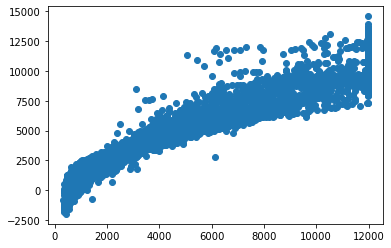

In [82]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [83]:
# R square on training data
regression_model.score(X_train, y_train)

0.9312287832968958

In [84]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9316264205922415

R-square is the percentage of the response variable variation that is explained by a linear model. It denotes the power of explain ability of selected independent variable(s) to the variation of response variable. 

𝑅2 = 1 −1𝑛∑ (𝑦𝑖 − 𝑦ℎ𝑎𝑡𝑖)𝑛 2𝑖=11𝑛∑ (𝑦𝑖 − 𝑦̅

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9312287832968958 and 0.9316264205922415.

In [85]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

906.8992122331998

906.899 is an average diffrence between the actual and predicted values. 

In [86]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.2937284982526

In [87]:
#MAPE ( Mean Absoulte Percentage Error) for train data
pred=regression_model.predict(X_train)
residual = y_train - pred
percentage_error = residual / y_train
np.abs(percentage_error).mean()

price    0.374505
dtype: float64

In [88]:
#MAPE ( Mean Absoulte Percentage Error)for test data
pred=regression_model.predict(X_test)
residual = y_test - pred
percentage_error = residual / y_test
np.abs(percentage_error).mean()

price    0.379612
dtype: float64

for the test data the diffrence between the actual and predicted values on an average is 37 percent. With an Rsquare value 93 we are getting Mean Absoulte Percentage Error of 37% on an average.

Adjusted R-squared – It is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. 

Text(0, 0.5, 'Pred Y')

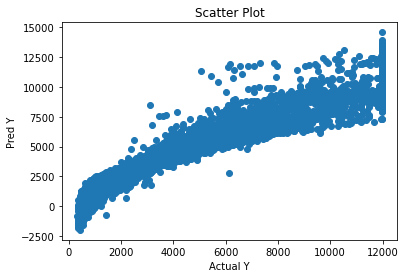

In [89]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)
plt.title('Scatter Plot')
plt.xlabel("Actual Y")
plt.ylabel("Pred Y")

#### From the above Scatter Plot, very strong corelation is between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

### Linear regression Performance Metrics:

intercept for the model: -5020.968802173284

R square on Training data: 0.9312287832968958

R square on Testing data: 0.9316264205922415

RMSE on Training data: 906.8992122331998

RMSE on Testing data: 911.2937284982526

MAPE on Training data: 0.374505 

MAPE on Testing data:  0.379612

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

#### Linear Regression using statsmodels

In [90]:
### R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
### influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
### Scikit does not provide a facility for adjusted R^2... so we use 
### statsmodel, a library that gives results similar to
#### which we obtain in R language
### This library expects the X and Y to be given in one single dataframe
## The main diffrence is by using Linear Regresssion we will not get much of model output but by using stats model we will find a lot of stats model output.


In [91]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,59.0,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [92]:
data_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11971,1.510,2.0,1.0,2.0,63.0,59.0,7.26,7.31,4.59,8758.0
3294,1.020,3.0,3.0,2.0,60.8,58.0,6.50,6.46,3.94,4718.0
25427,2.025,3.0,6.0,1.0,60.0,58.0,8.31,8.23,4.96,11965.0
709,1.710,2.0,4.0,4.0,61.9,61.0,7.61,7.67,4.73,11965.0
8010,1.500,1.0,2.0,3.0,63.9,59.0,7.25,7.18,4.61,8165.0


In [93]:
expr= "price~carat+cut+color+clarity+depth+table+x+y+z"

In [94]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept   -5020.968802
carat        8887.182246
cut           113.330640
color         273.225992
clarity       436.898475
depth          35.446433
table         -15.069204
x           -1348.721385
y            1561.844341
z            -970.503039
dtype: float64

In [95]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:53:20   Log-Likelihood:            -1.5509e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5020.9688    800.101     -6.275      0.0

1) As the Rsquare and Adj. Rsquare values are almost equal which is 0.931 that means whatever the variables we are having in the model is not negatively impacting the model result.It is Ok to keep in the model.

2) Now here from the above table summary the P>|t| column is very important to predict which variable is significant.
3) If any variable is greater than the 0.05 alfha that means that variable is not significant

The overall P value is less than alpha, so rejecting H0 and accepting Ha that all  regression co-efficient is  0. Here all regression co-efficients are 0 except Depth but is also close to zero.
So by this model as all values are less than 0.05 ,So we can say all coefficents are important here to predict the price of the cubic zirconia.

we can see the p value is showing 0.001 for 'depth' variable, which is much lower than 0.05. That means this dimension is useful. So we can say that the attribute which are having p value lesser than 0.05 are poor predictor for price.

In [96]:
residuals= y_test.values - y_pred.values
mean1=np.mean(residuals)
mean1

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [98]:
y_pred = lm1.predict(data_test)

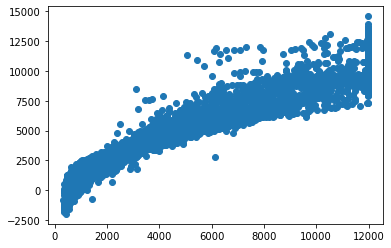

In [99]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [100]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-5020.97) * Intercept + (8887.18) * carat + (113.33) * cut + (273.23) * color + (436.9) * clarity + (35.45) * depth + (-15.07) * table + (-1348.72) * x + (1561.84) * y + (-970.5) * z + 

#### Now building another model by doing scaling and performing VIF technique 

In [101]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [102]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [103]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1818110678016307
The coefficient for cut is 0.0364576167194635
The coefficient for color is 0.13464282711260628
The coefficient for clarity is 0.2083158705995447
The coefficient for depth is 0.01249581539886233
The coefficient for table is -0.009396637171999008
The coefficient for x is -0.4372590563807135
The coefficient for y is 0.502901432931364
The coefficient for z is -0.19444498389036463


In [104]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7.256670475565837e-16


By using zscore in scaling we can see a significant drop down in the value of intercept from -5020.9688 to -7.256670475565837e-16

In [105]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9315877991921917

In [106]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9312287832968958

We can observe by applying z score the intercept became -7.256670475565837e-16. Earlier it was -5020.9688. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.81533420992797
cut ---> 10.301700261178262
color ---> 5.545655069061815
clarity ---> 5.459090831787078
depth ---> 1219.3088141451183
table ---> 874.1719859615408
x ---> 10678.52359972728
y ---> 9425.444226847116
z ---> 3317.944059606902


In [108]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,122.8,carat
1,10.3,cut
2,5.5,color
3,5.5,clarity
4,1219.3,depth
5,874.2,table
6,10678.5,x
7,9425.4,y
8,3317.9,z


#### We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

In [109]:
data_train1 = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test1=pd.concat([X_test_scaled ,y_test_scaled ],axis=1)
data_train1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.668077,-1.716974,0.942034,-1.243104,1.269083,-0.660885,0.713451,0.760994,0.883039,0.097115
12108,0.472372,-0.818090,1.528825,-1.243104,1.843266,-0.660885,0.508309,0.581385,0.753145,0.415485
20181,-0.266960,-1.716974,-1.405128,-0.030183,-0.863596,1.843240,-0.116038,-0.083170,-0.184973,-0.584445
4712,-0.071254,-1.716974,-0.231547,-0.636644,-2.258041,2.585202,0.285328,0.213186,-0.098378,-0.370752
2548,0.472372,0.080793,-0.231547,0.576277,0.858953,0.730295,0.570743,0.545463,0.652117,0.835351


In [110]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train1).fit()
lm2.params

Intercept   -4.033232e-17
carat        1.181811e+00
cut          3.645762e-02
color        1.346428e-01
clarity      2.083159e-01
depth        1.249582e-02
table       -9.396637e-03
x           -4.372591e-01
y            5.029014e-01
z           -1.944450e-01
dtype: float64

In [111]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:04:48   Log-Likelihood:                -1516.3
No. Observations:               18847   AIC:                             3053.
Df Residuals:                   18837   BIC:                             3131.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.033e-17      0.002  -2.11e-14      1.0

There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -0.4373. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

Similarly for the 'z' variable having negative co-efficient i.e -0.1944 . And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

In [112]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.18) * carat + (0.04) * cut + (0.13) * color + (0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.44) * x + (0.5) * y + (-0.19) * z + 

In [113]:
residuals= y_test.values - y_pred.values
mean_residuals = np.mean(residuals)
print(mean_residuals)

3.3733751163038876


#### Building the Random Forest model

In [114]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth=10,min_samples_split=100,random_state=1,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)
rfcl

RandomForestRegressor(max_depth=10, min_samples_split=100, oob_score=True,
                      random_state=1)

In [115]:
rfcl.score(X_train, y_train)

0.9835563016806007

In [116]:
rfcl.score(X_test, y_test)

0.9809999422837423

In [117]:
#Out of bag (OOB) score is a way of validating the Random forest model.
rfcl.oob_score_*100

98.11584880711088

In [118]:
pd.DataFrame(rfcl.feature_importances_,index=X_train.columns)

,0
carat,0.728739
cut,0.000321
color,0.019957
clarity,0.061870
depth,0.000086
table,0.000054
x,0.002444
y,0.185310
z,0.001220


1 )Random forest also provides the facility of features importance. Here the features are arranged according to the importance in ascending order.

2) The most important features are carat , clarity and color and the least one are X,depth and Z.

3) The values of Table,depth are very less and adding very less value to the model


### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

#### Data Dictionary:

Variable Name	Description

Holiday_Package 	 Opted for Holiday Package yes/no?

Salary 	 Employee salary

age 	 Age in years

edu 	 Years of formal education

no_young_children 	 The number of young children (younger than 7 years)

no_older_children 	 Number of older children

foreign 	 foreigner Yes/No

Problem 1 endxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Problem 2: Logistic Regression and LDA


### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

Variable Name	

Holiday_Package 	 Opted for Holiday Package yes/no?

Salary 	 Employee salary

age 	 Age in years

edu 	 Years of formal education

no_young_children 	 The number of young children (younger than 7 years)

no_older_children 	 Number of older children

foreign 	 foreigner Yes/No

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # To supress warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [362]:
hol=pd.read_csv("Holiday_Package.csv")
hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [363]:
hol.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [364]:
hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [365]:
hol.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


### Q 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [136]:
hol.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [367]:
hol.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [368]:
100 * hol.isnull().sum() / len(hol)

Unnamed: 0          0.00000
Holliday_Package    0.00000
Salary              0.00000
age                 0.00000
educ                0.00000
no_young_children   0.00000
no_older_children   0.00000
foreign             0.00000
dtype: float64

In [369]:
dups = hol.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [141]:
hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [144]:
print("Number of rows: ",hol.shape[0], "\n""Number. of columns: ",hol.shape[1])

Number of rows:  872 
Number. of columns:  7


In [145]:
hol.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.00000,872.00000,872.00000,872.00000,872.00000
mean,47729.17202,39.95528,9.30734,0.31193,0.98280
std,23418.66853,10.55167,3.03626,0.61287,1.08679
min,1322.00000,20.00000,1.00000,0.00000,0.00000
25%,35324.00000,32.00000,8.00000,0.00000,0.00000
50%,41903.50000,39.00000,9.00000,0.00000,1.00000
75%,53469.50000,48.00000,12.00000,0.00000,2.00000
max,236961.00000,62.00000,21.00000,3.00000,6.00000


1. Employes having a age of 39 are about 50 percent with a salary of about 41903.
2. Employes who are having a max age of 62 is also having the highest education of 21  going with 3 young childern  and 6 older childrens.
3. Salary range is starting from 1322 and going upto 236961.
4. The minimum employe of age having 20 is having the min salary of 1322 going with no young or elder child.
5. From the above table we can see that as the age increses salary and Education also increases.
6. We can also Observe from age 20 to about 48,  75% of employes does't have young childern with them. Whereas 25% of employes have no young nad elder children with them.

In [146]:
hol.describe(include='object')

,Holliday_Package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


1. 471 Employes are the ones who have not opted for Holiday package
2. 656 Employes are not gone to foreign tour out of 872 

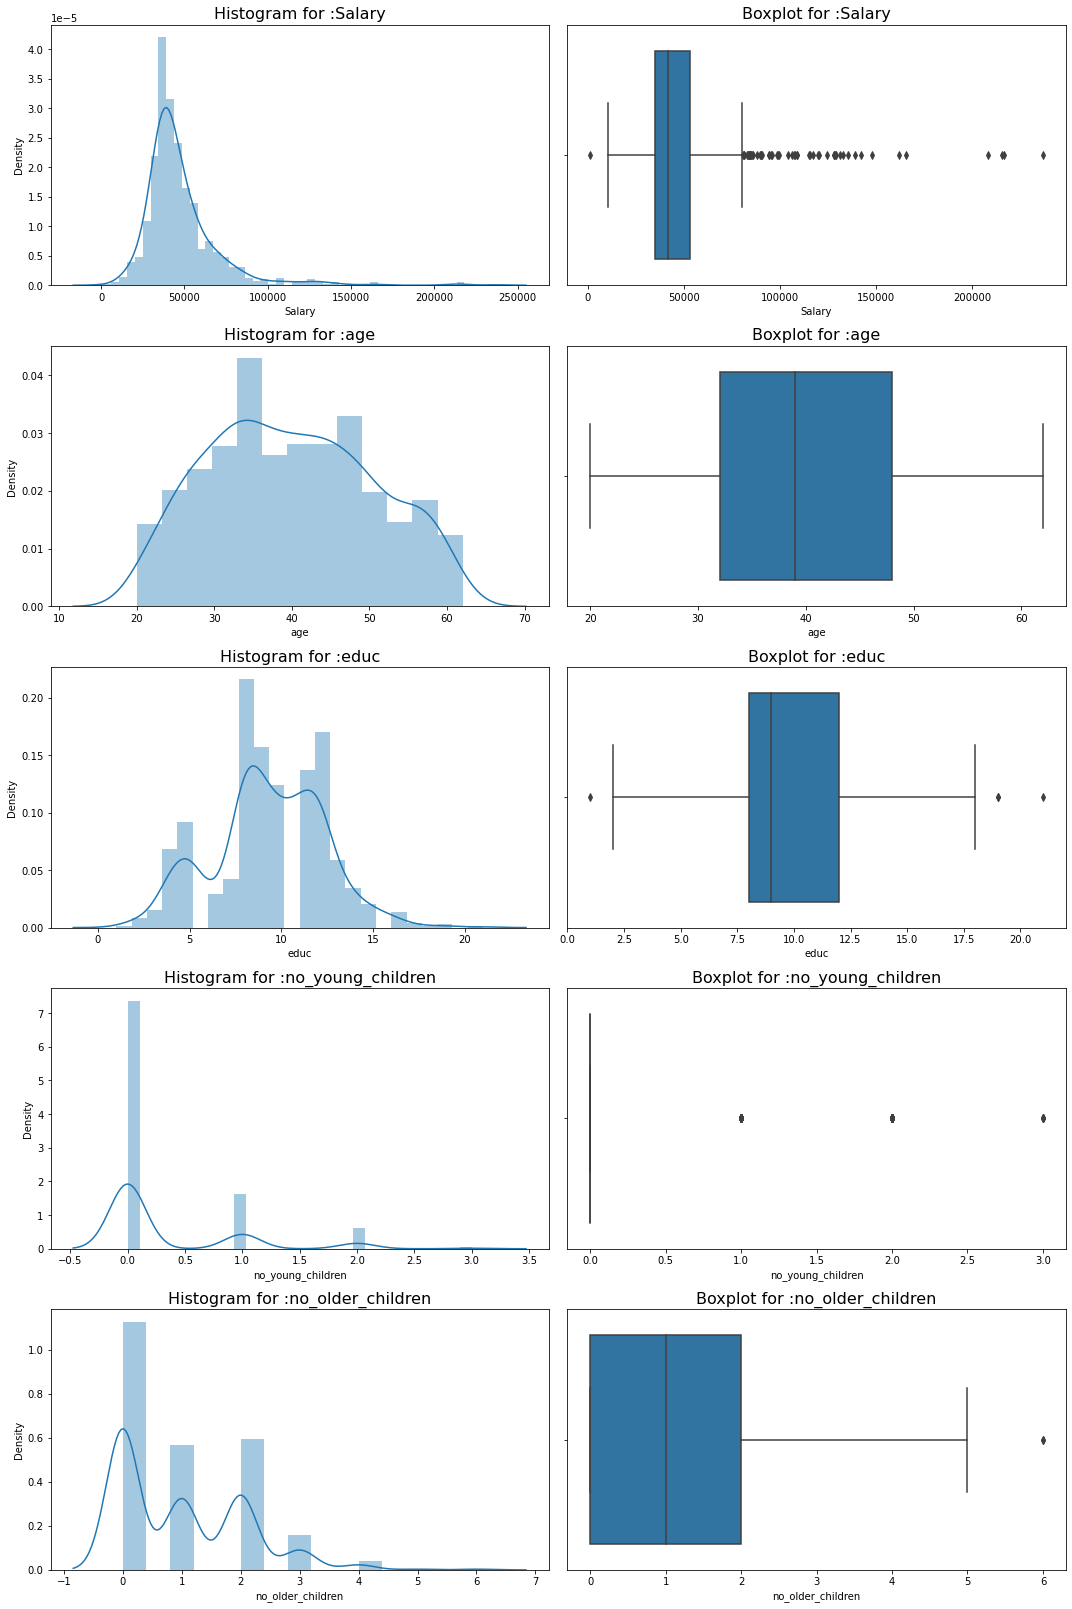

In [152]:
a=1
plt.figure(figsize=(15,80))
for i in hol.columns :
    if hol[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(hol[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(hol[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

From the above histogram and Boxplot chart we have following Observations :-a

1. Almost all variables have outliers present in them except Age.
2. Only Age column is looking normally distrubed and all other right skew.
3. In Age column the most customer are insured around from age 30 to 40.
4. Most number of employes are having Salary in between 0 to 50000
5. Younger and older children median variableslue lies on 0,So almost very less children goes for holiday.
6. Most number of employes are having education in between 5 t 15

Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.

A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.

A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.

A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

In [153]:
print("Skewness values"'\n',hol.skew())

Skewness values
 Salary               3.10322
age                  0.14641
educ                -0.04550
no_young_children    1.94651
no_older_children    0.95395
dtype: float64


As from the table we can easily infere that all the columns are having a positive value thats why thier tail is on the right side and they will be right skew.But educ is in negative but it is also close to 0 So it will be vvery less to left skew.

### Visulization of Categorical Variables

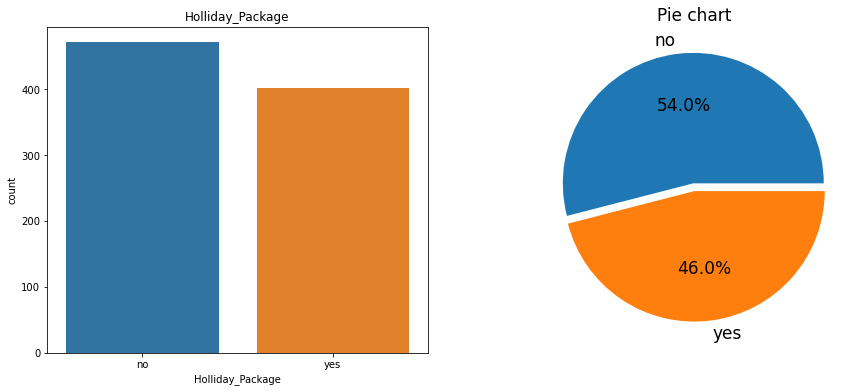

In [173]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(hol['Holliday_Package'])
plt.title("Holliday_Package")
plt.subplot(1,2,2)
plt.pie(hol['Holliday_Package'].value_counts(),labels=hol['Holliday_Package'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.01],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)
plt.show();

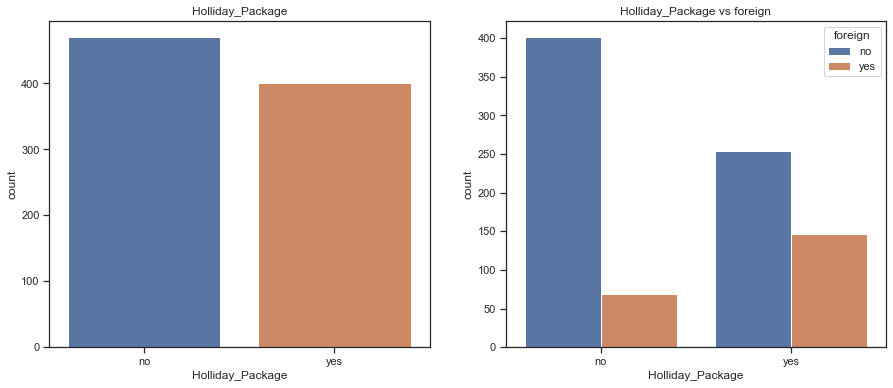

In [207]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(hol['Holliday_Package'])
plt.title("Holliday_Package")
plt.subplot(1,2,2)
sns.countplot(hol['Holliday_Package'],hue=("foreign"),data=hol)
plt.title("Holliday_Package vs foreign");

Text(0.5, 1.0, 'Swarm Plot of Holliday_Package vs Salary')

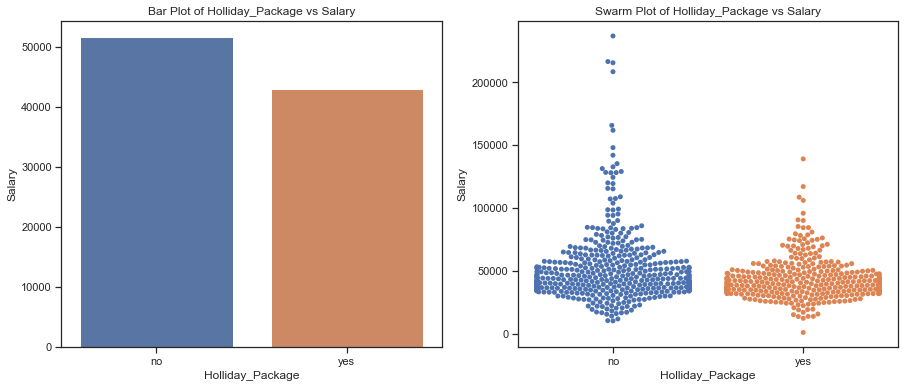

In [206]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=hol['Holliday_Package'],y=("Salary"),data=hol,ci=False)
plt.title("Bar Plot of Holliday_Package vs Salary")
plt.subplot(1,2,2)
sns.swarmplot(x="Holliday_Package", y="Salary", data=hol)
plt.title("Swarm Plot of Holliday_Package vs Salary")

Text(0.5, 1.0, 'Swarm Plot of Holliday_Package vs Age')

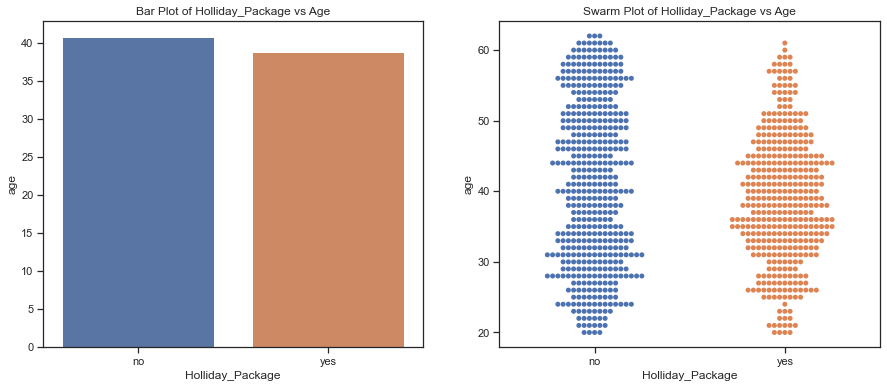

In [209]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=hol['Holliday_Package'],y=("age"),data=hol,ci=False)
plt.title("Bar Plot of Holliday_Package vs Age")
plt.subplot(1,2,2)
sns.swarmplot(x="Holliday_Package", y="age", data=hol)
plt.title("Swarm Plot of Holliday_Package vs Age")

Text(0.5, 1.0, 'Swarm Plot of Holliday_Package vs Education')

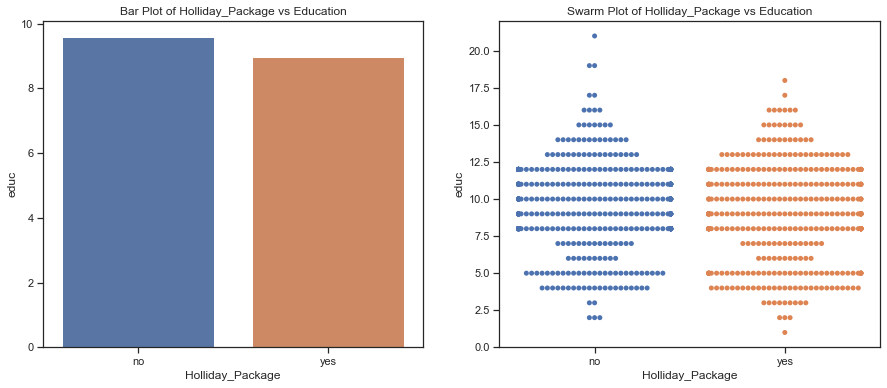

In [210]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=hol['Holliday_Package'],y=("educ"),data=hol,ci=False)
plt.title("Bar Plot of Holliday_Package vs Education")
plt.subplot(1,2,2)
sns.swarmplot(x="Holliday_Package", y="educ", data=hol)
plt.title("Swarm Plot of Holliday_Package vs Education")

Text(0.5, 1.0, 'Swarm Plot of Holliday_Package vs no_young_children')

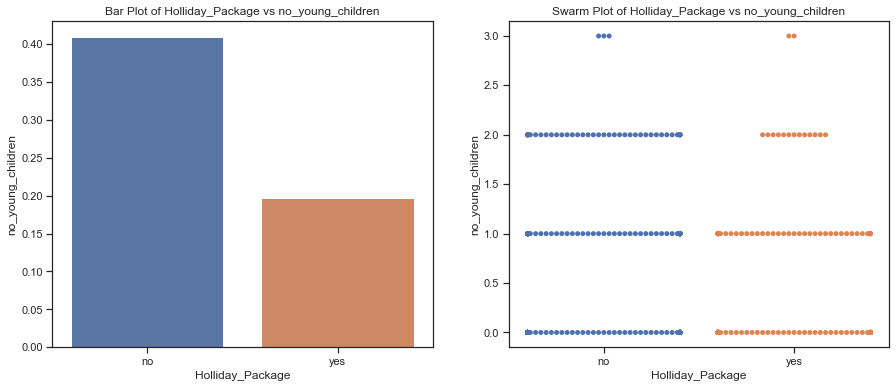

In [215]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=hol['Holliday_Package'],y=("no_young_children"),data=hol,ci=False)
plt.title("Bar Plot of Holliday_Package vs no_young_children")
plt.subplot(1,2,2)
sns.swarmplot(x="Holliday_Package", y="no_young_children", data=hol)
plt.title("Swarm Plot of Holliday_Package vs no_young_children")

Text(0.5, 1.0, 'Swarm Plot of Holliday_Package vs no_older_children')

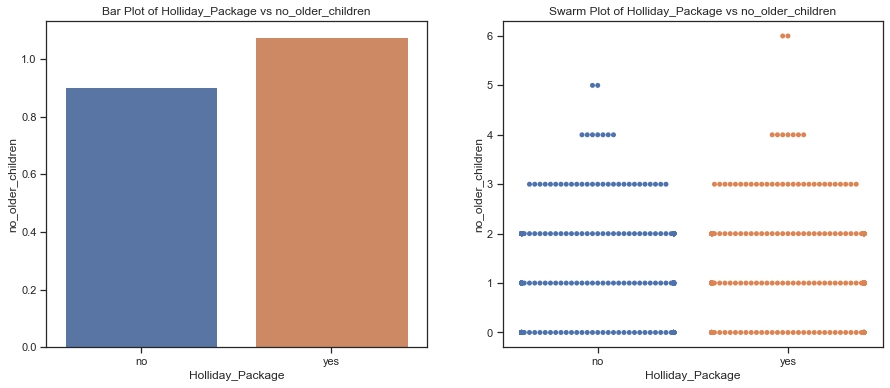

In [216]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=hol['Holliday_Package'],y=("no_older_children"),data=hol,ci=False)
plt.title("Bar Plot of Holliday_Package vs no_older_children")
plt.subplot(1,2,2)
sns.swarmplot(x="Holliday_Package", y="no_older_children", data=hol)
plt.title("Swarm Plot of Holliday_Package vs no_older_children")

From the above table we can see that as the age increses salary and Education also increases.

Text(0.5, 1.0, 'Salary vs Age')

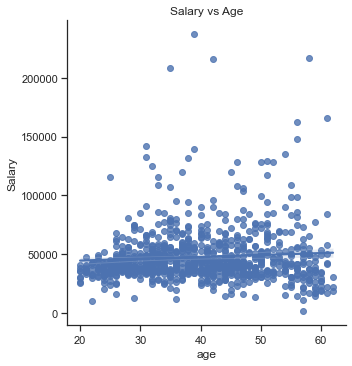

In [371]:
sns.lmplot(data = hol, x='age',y='Salary',palette="Set2")
plt.title("Salary vs Age",fontsize=12)

Text(0.5, 1.0, 'Educ vs Age')

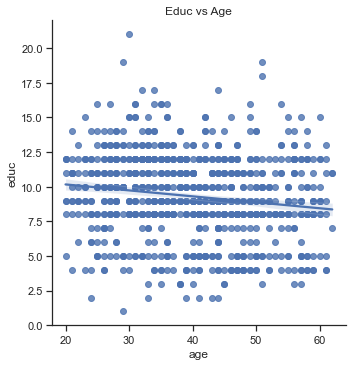

In [372]:
sns.lmplot(data = hol, x='age',y='educ',palette="Set1")
plt.title("Educ vs Age",fontsize=12)

Text(0.5, 1.0, 'Salary vs Age')

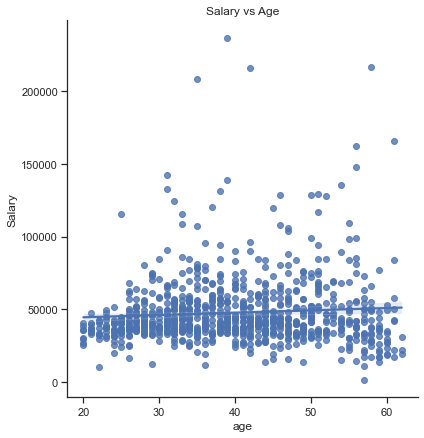

In [373]:
sns.lmplot(data = hol, x='age',y='Salary',height=6)
plt.title("Salary vs Age",fontsize=12)

Text(0.5, 1.0, 'Salary vs Educ')

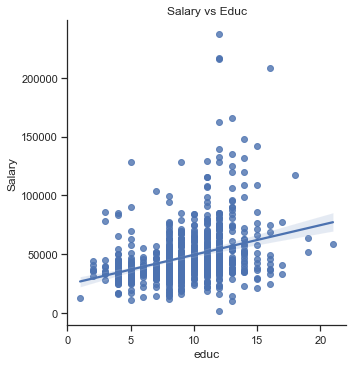

In [374]:
sns.lmplot(data = hol, x='educ',y='Salary',palette="Set1")
plt.title("Salary vs Educ",fontsize=12)

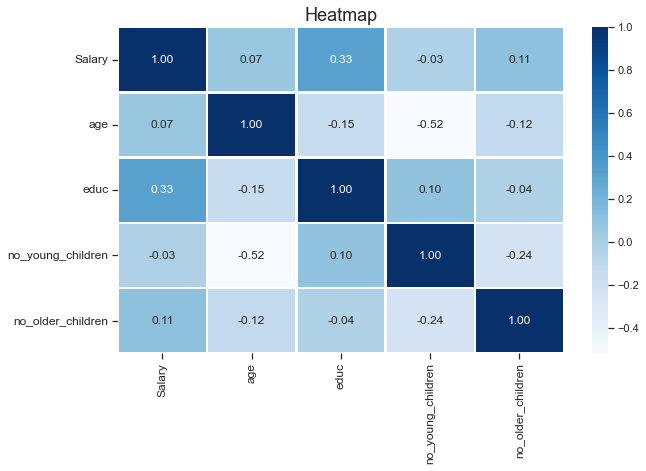

In [253]:
plt.figure(figsize=(10,6))
res=sns.heatmap(hol.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);
plt.title('Heatmap',fontsize = 18);
plt.savefig("heatmap")

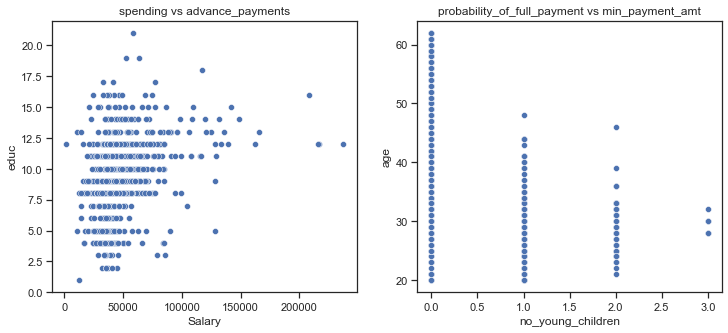

In [378]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('spending vs advance_payments')
sns.scatterplot(x="Salary",y="educ",data=hol)
plt.subplot(1,2,2)
plt.title('probability_of_full_payment vs min_payment_amt')
sns.scatterplot(x="no_young_children",y="age",data=hol);

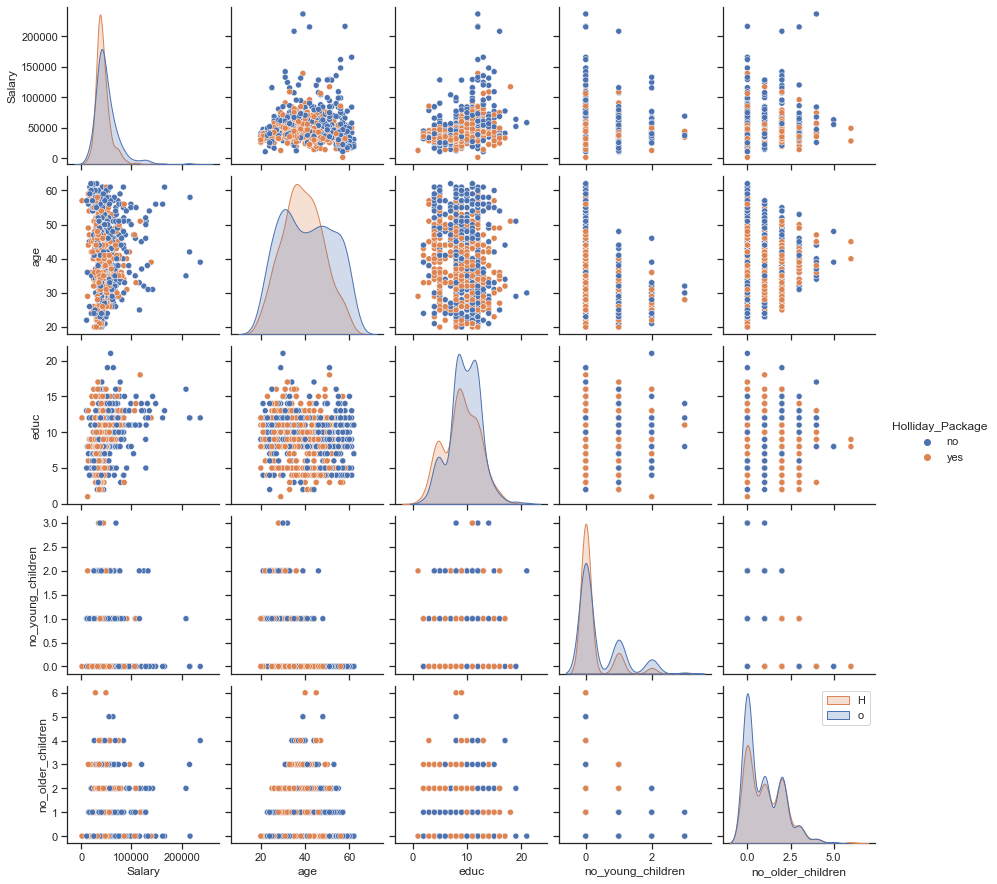

In [254]:
pairplot.fig.suptitle("PairPlot of Dataset")
sns.pairplot(hol ,diag_kind='kde' ,hue='Holliday_Package')
plt.legend(labels='Holiday_Package');

### Q 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [255]:
holl=hol

In [260]:
for feature in holl.columns: 
    if holl[feature].dtype == 'object': 
        print(feature)
        print(holl[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




<AxesSubplot:>

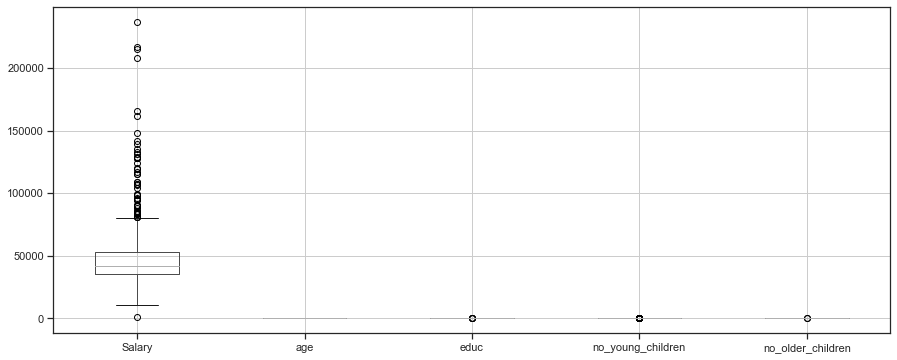

In [258]:
plt.figure(figsize=(15,6))
holl.boxplot()

<AxesSubplot:xlabel='no_young_children'>

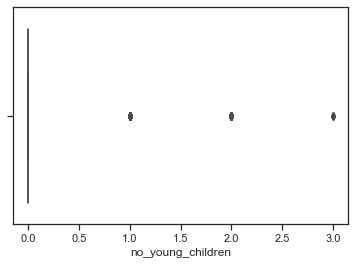

In [261]:
sns.boxplot(holl['no_young_children'])

In [266]:
## This is a loop to treat outliers for all the non-'object' type varible

 for column in holl.columns:
     if holl[column].dtype != 'object': 
         lr,ur=remove_outlier(holl[column])
         holl['no_young_children']=np.where(holl['no_young_children']>ur,ur,holl['no_young_children'])
#         holl[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

IndentationError: unexpected indent (<ipython-input-266-968290b9d678>, line 3)

In [267]:
holl["no_young_children"] = np.where(holl["no_young_children"] <0, 0,holl['no_young_children'])
holl["no_young_children"] = np.where(holl["no_young_children"] >2, 2,holl['no_young_children'])

<AxesSubplot:xlabel='no_young_children'>

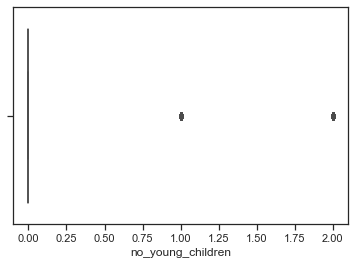

In [268]:
sns.boxplot(holl['no_young_children'])

In [ ]:
df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])
df["Income"] = np.where(df["Income"] >12681.0, 12681.0,df['Income'])

In [264]:
holl.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

<AxesSubplot:xlabel='Salary'>

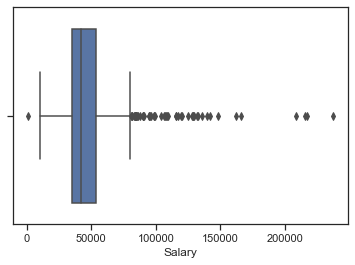

In [269]:
sns.boxplot(holl['Salary'])

In [ ]:
holl["no_young_children"] = np.where(holl["no_young_children"] <0, 0,holl['no_young_children'])
holl["no_young_children"] = np.where(holl["no_young_children"] >150000, 150000,holl['no_young_children'])

In [270]:
print(holl['Salary'].quantile(0.10))

29141.7


In [276]:
def remove_outlier(colss):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

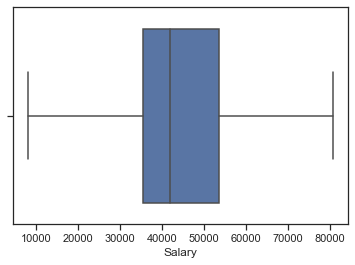

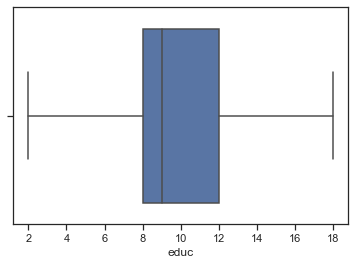

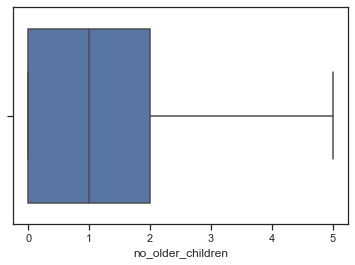

In [278]:
colss= ['Salary', 'educ', 'no_older_children']

for i in colss:
    sns.boxplot(holl[i])
    plt.show()

In [277]:
for column in holl[colss].columns:
    lr,ur=remove_outlier(holl[column])
    holl[column]=np.where(holl[column]>ur,ur,holl[column])
    holl[column]=np.where(holl[column]<lr,lr,holl[column])

NameError: name 'col' is not defined

<AxesSubplot:>

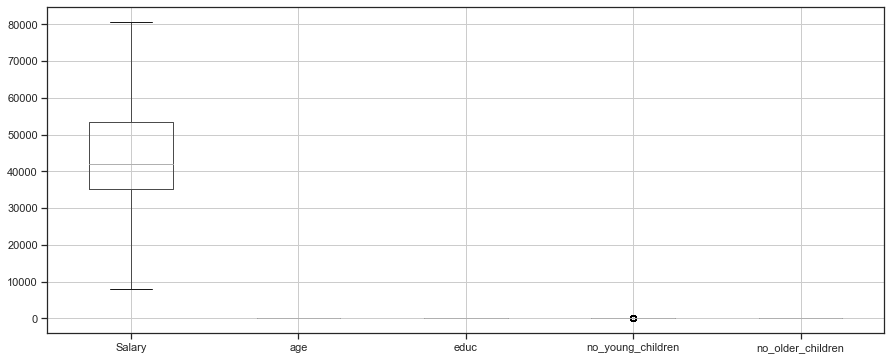

In [275]:
plt.figure(figsize=(15,6))
holl.boxplot()

In [283]:
#Converting all objects to categorical codes
for feature in holl.columns: 
    if holl[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holl[feature].unique()))
        print(pd.Categorical(holl[feature].unique()).codes)
        holl[feature] = pd.Categorical(holl[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [284]:
holl.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.00000,30.00000,8.00000,1,1.00000,0
1,1,37207.00000,45.00000,8.00000,0,1.00000,0
2,0,58022.00000,46.00000,9.00000,0,0.00000,0
3,0,66503.00000,31.00000,11.00000,2,0.00000,0
4,0,66734.00000,44.00000,12.00000,0,2.00000,0


In [285]:
holl.dtypes

Holliday_Package        int8
Salary               float64
age                  float64
educ                 float64
no_young_children      int64
no_older_children    float64
foreign                 int8
dtype: object

In [286]:
dups = holl.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [289]:
holl.drop_duplicates(inplace=True)

In [290]:
dups = holl.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [291]:
holl.shape

(871, 7)

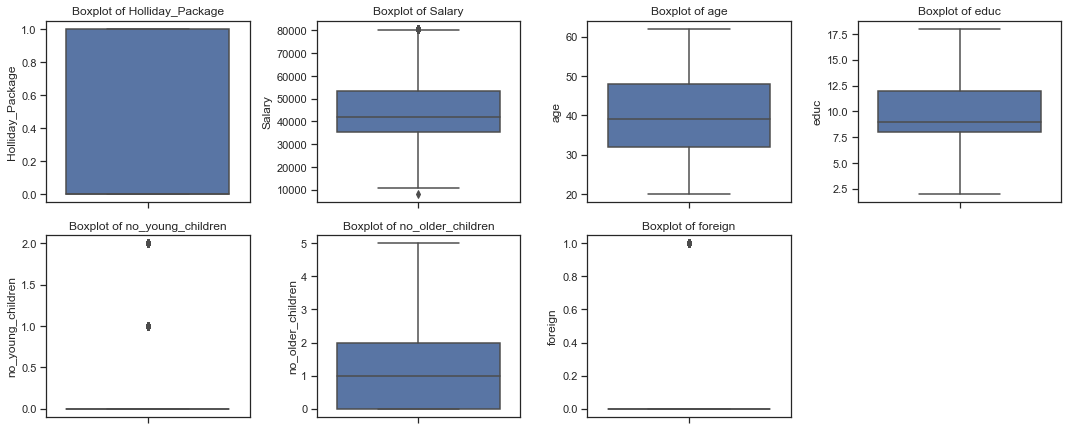

In [292]:
#Check to verify if outliers have been treated
plt.figure(figsize = (15,15))
feature_list = holl.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = holl[feature_list[i]], data = holl)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [401]:
# Copy all the predictor variables into X dataframe
X = holl.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = holl['Holliday_Package']

In [402]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [403]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Observations',609+262)

Dimensions of the training and test data
X_train (609, 6)
X_test (262, 6)
y_train (609,)
y_test (262,)
Total Observations 871


In [404]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.00000,30.00000,8.00000,1,1.00000,0
1,37207.00000,45.00000,8.00000,0,1.00000,0
2,58022.00000,46.00000,9.00000,0,0.00000,0
3,66503.00000,31.00000,11.00000,2,0.00000,0
4,66734.00000,44.00000,12.00000,0,2.00000,0


### Logistic Regression

In [383]:
### Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [331]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [395]:
model = LogisticRegression(max_iter=100000,n_jobs=-1)
model

LogisticRegression(max_iter=100000, n_jobs=-1)

In [396]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [391]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [392]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [393]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')

In [337]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [394]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Salary is 1.1818110678016307
The coefficient for age is 0.0364576167194635
The coefficient for educ is 0.13464282711260628
The coefficient for no_young_children is 0.2083158705995447
The coefficient for no_older_children is 0.01249581539886233
The coefficient for foreign is -0.009396637171999008


In [338]:
ytrain_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [339]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.54124,0.45876
1,0.47890,0.52110
2,0.92404,0.07596
3,0.20059,0.79941
4,0.44117,0.55883


              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.65      0.65       609
weighted avg       0.66      0.66      0.66       609
 



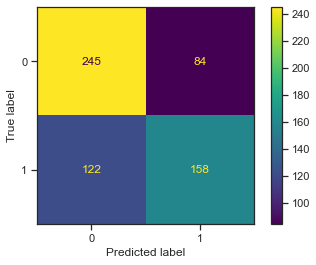

In [340]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       141
           1       0.65      0.51      0.57       121

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



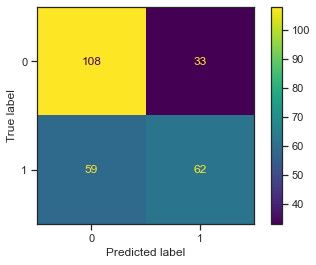

In [341]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [342]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6617405582922824

Area Under the Curve of Training data: 0.738


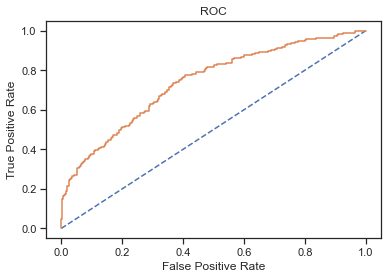

In [520]:
### AUC and ROC for the training data
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve of Training data: %.3f' % lr_train_auc)

Area Under the Curve for Testing data: 0.711


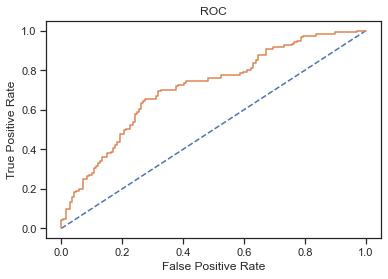

In [521]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('Area Under the Curve for Testing data: %.3f' % lr_test_auc)

L.R. - AUC of Training data: 0.738
L.R. - AUC for Testing data: 0.711


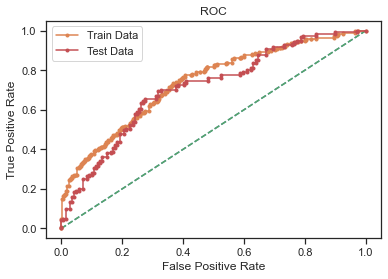

In [532]:
plt.figure(0).clf()

### AUC and ROC for the training data
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label='Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('L.R. - AUC of Training data: %.3f' % lr_train_auc)
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,marker='.',label='Test Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
print('L.R. - AUC for Testing data: %.3f' % lr_test_auc)
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Training Data: 0.737
AUC for the Test Data: 0.708


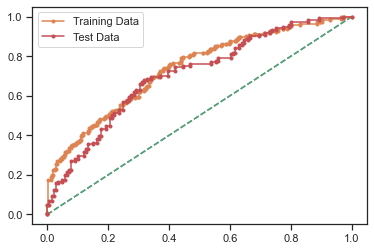

In [528]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [346]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.648854961832061

In [348]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.56
lr_train_f1  0.61


In [349]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.65
lr_test_recall  0.51
lr_test_f1  0.57


### LDA MODEL

In [397]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis()

In [496]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [497]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

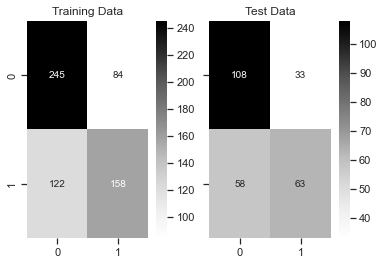

In [498]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [499]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.65      0.65       609
weighted avg       0.66      0.66      0.66       609
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.70       141
           1       0.66      0.52      0.58       121

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



In [500]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [501]:
pred_prob_train[:,1]

array([0.33824556, 0.82619566, 0.22022348, 0.08644384, 0.19842896,
       0.12286186, 0.45162845, 0.26054802, 0.37326297, 0.07254666,
       0.64922493, 0.3071482 , 0.59046336, 0.28158032, 0.40704596,
       0.25446371, 0.6180758 , 0.66993867, 0.52857411, 0.74617458,
       0.59864155, 0.80620109, 0.80492643, 0.38185568, 0.34455978,
       0.82250147, 0.35496762, 0.28035433, 0.36652489, 0.50142553,
       0.32509606, 0.39016366, 0.23122215, 0.76508486, 0.51504439,
       0.32206815, 0.44186031, 0.64471247, 0.82612384, 0.48617698,
       0.30858234, 0.56504277, 0.30914807, 0.51864821, 0.32129158,
       0.59750947, 0.3866568 , 0.55650882, 0.4057093 , 0.72848186,
       0.361483  , 0.67268135, 0.71867514, 0.62083638, 0.37924439,
       0.55685617, 0.40813098, 0.29757621, 0.66072045, 0.81918378,
       0.63174827, 0.5393889 , 0.19048722, 0.85042633, 0.17645917,
       0.36312092, 0.5747898 , 0.6978318 , 0.38510286, 0.39479367,
       0.74032968, 0.14403152, 0.59929211, 0.69599014, 0.39190

LDA- AUC for the Training Data: 0.737
LDA-AUC for the Test Data: 0.708


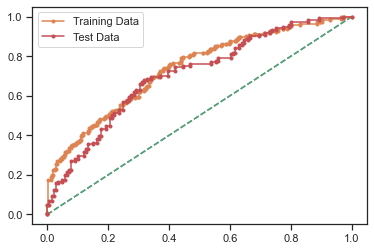

In [533]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('LDA- AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('LDA-AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4762
F1 Score 0.6354 

Confusion Matrix


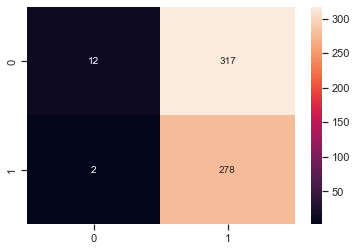

0.2 

Accuracy Score 0.5205
F1 Score 0.649 

Confusion Matrix


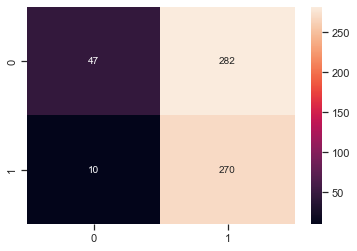

0.3 

Accuracy Score 0.6108
F1 Score 0.6784 

Confusion Matrix


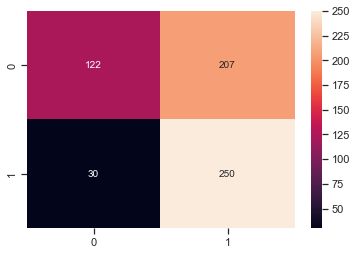

0.4 

Accuracy Score 0.67
F1 Score 0.67 

Confusion Matrix


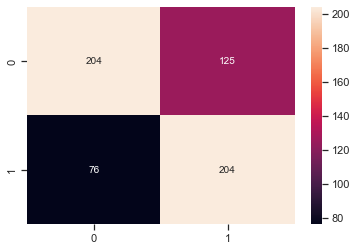

0.5 

Accuracy Score 0.6617
F1 Score 0.6054 

Confusion Matrix


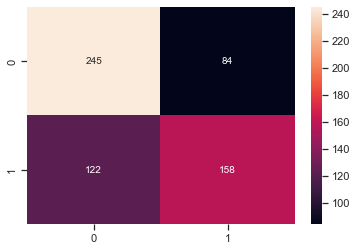

0.6 

Accuracy Score 0.6683
F1 Score 0.5491 

Confusion Matrix


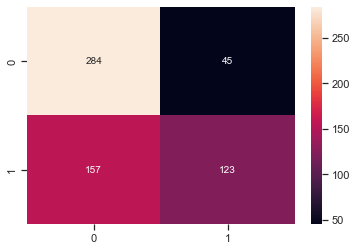

0.7 

Accuracy Score 0.6486
F1 Score 0.4398 

Confusion Matrix


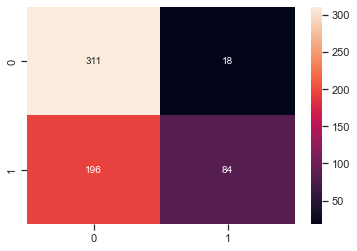

0.8 

Accuracy Score 0.5961
F1 Score 0.2215 

Confusion Matrix


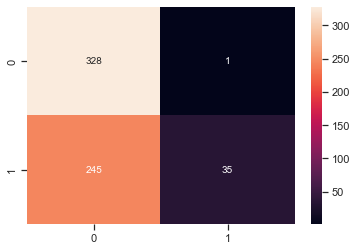

0.9 

Accuracy Score 0.5435
F1 Score 0.0142 

Confusion Matrix


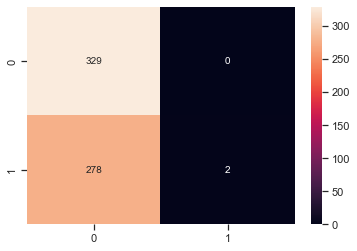

In [507]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.3 

Accuracy Score 0.6108
F1 Score 0.6784 

Confusion Matrix


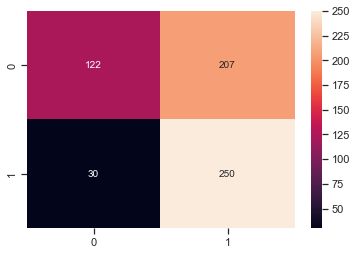

0.4 

Accuracy Score 0.67
F1 Score 0.67 

Confusion Matrix


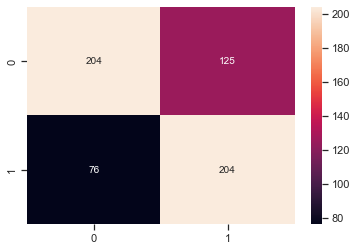

0.5 

Accuracy Score 0.6617
F1 Score 0.6054 

Confusion Matrix


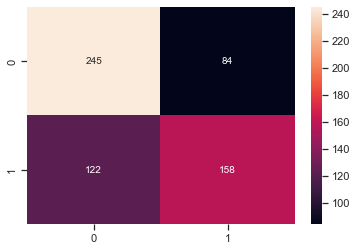

0.6 

Accuracy Score 0.6683
F1 Score 0.5491 

Confusion Matrix


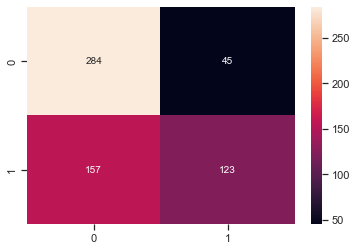

0.7 

Accuracy Score 0.6486
F1 Score 0.4398 

Confusion Matrix


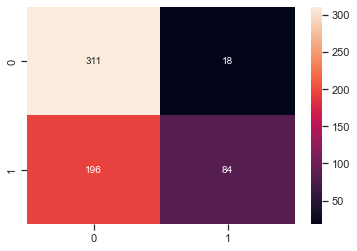

0.8 

Accuracy Score 0.5961
F1 Score 0.2215 

Confusion Matrix


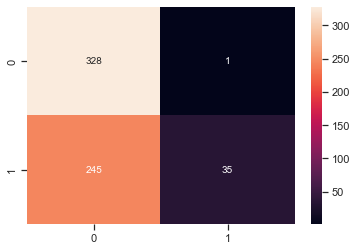

0.9 

Accuracy Score 0.5435
F1 Score 0.0142 

Confusion Matrix


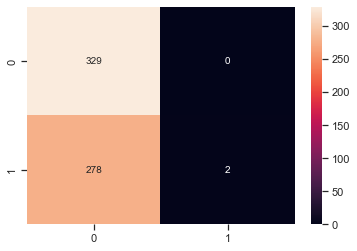

1.0 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


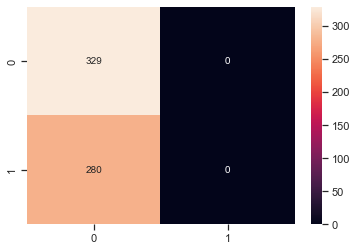

1.1 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


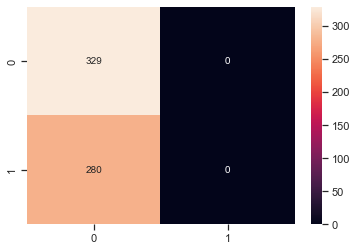

1.2 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


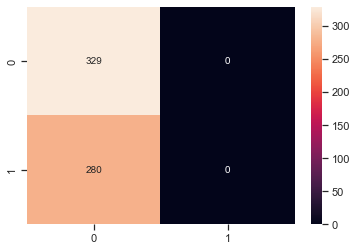

1.3 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


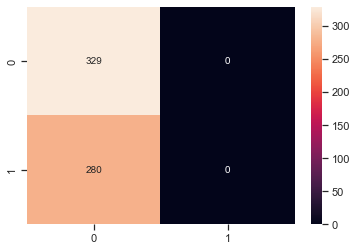

1.4 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


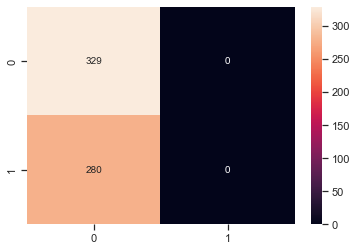

1.5 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


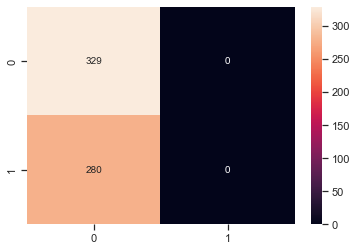

1.6 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


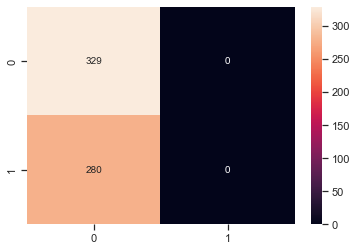

1.7 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


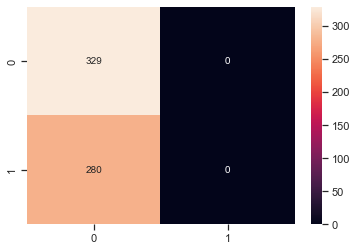

1.8 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


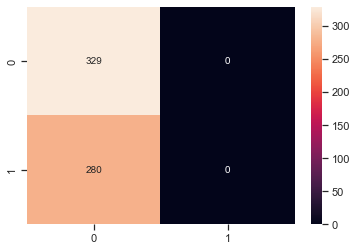

1.9 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


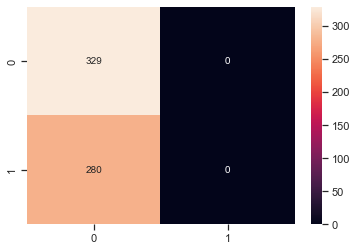

2.0 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


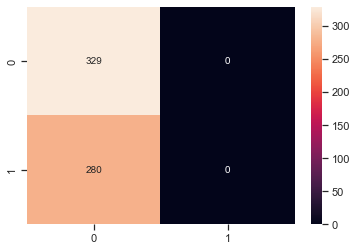

2.1 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


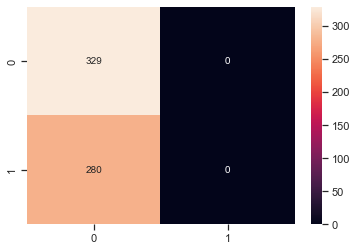

2.2 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


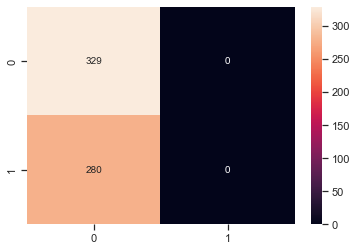

2.3 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


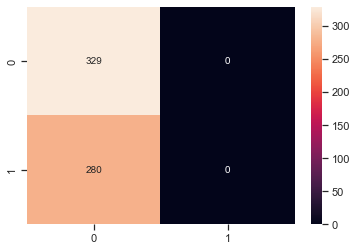

2.4 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


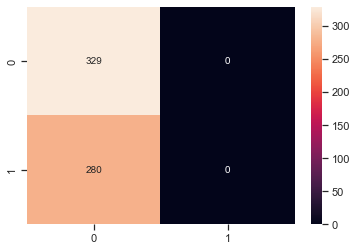

2.5 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


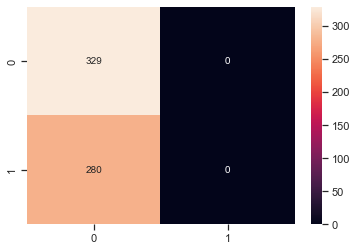

2.6 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


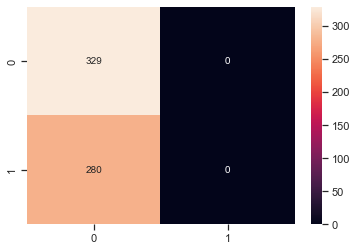

2.7 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


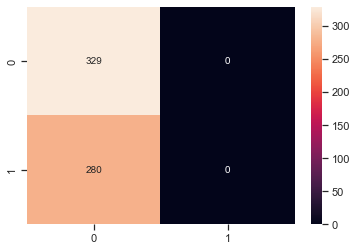

2.8 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


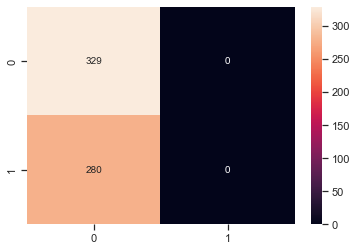

2.9 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


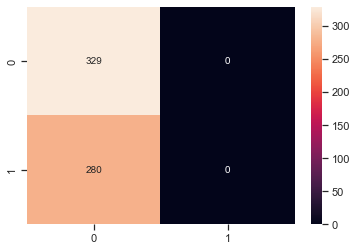

3.0 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


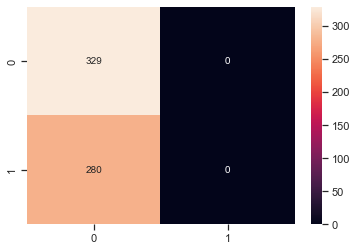

3.1 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


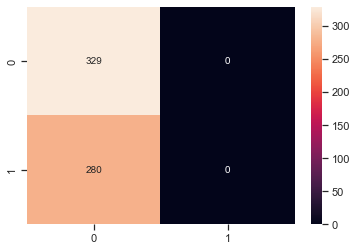

3.2 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


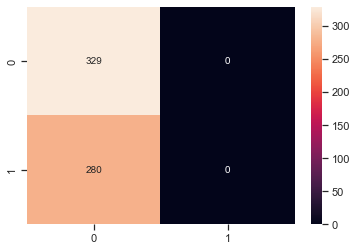

3.3 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


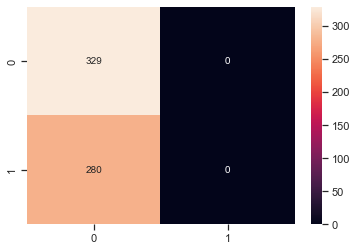

3.4 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


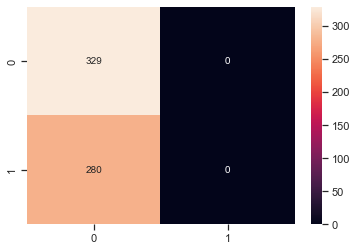

3.5 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


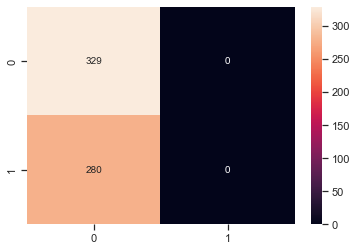

3.6 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


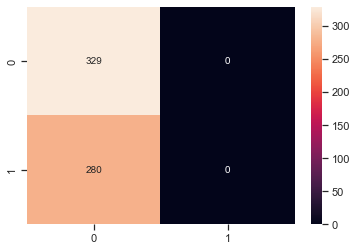

3.7 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


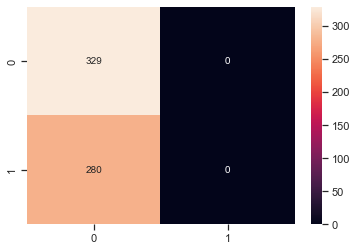

3.8 

Accuracy Score 0.5402
F1 Score 0.0 

Confusion Matrix


KeyboardInterrupt: 

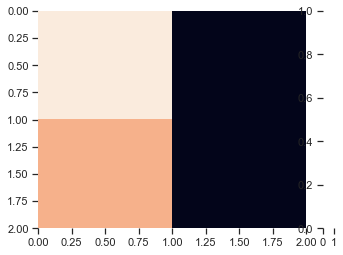

In [512]:
for j in np.arange(0.3,4,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [509]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

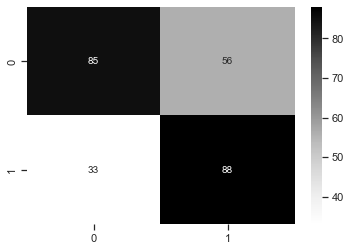

In [510]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [511]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.70       141
           1       0.66      0.52      0.58       121

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.60      0.66       141
           1       0.61      0.73      0.66       121

    accuracy                           0.66       262
   macro avg       0.67      0.67      0.66       262
weighted avg       0.67      0.66      0.66       262
 



In [513]:
#Predicting the classes on the train data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [516]:
print('Classification Report of the default cut-off train data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n\n\n')
print('Classification Report of the custom cut-off train data:\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off train data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.65      0.65       609
weighted avg       0.66      0.66      0.66       609
 



Classification Report of the custom cut-off train data:

               precision    recall  f1-score   support

           0       0.73      0.62      0.67       329
           1       0.62      0.73      0.67       280

    accuracy                           0.67       609
   macro avg       0.67      0.67      0.67       609
weighted avg       0.68      0.67      0.67       609
 



In [303]:
#Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [304]:
pred_class_test

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [305]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [307]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.6617405582922824

In [309]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.65      0.65       609
weighted avg       0.66      0.66      0.66       609



In [310]:
confusion_matrix(y_train, pred_class_train)

array([[245,  84],
       [122, 158]], dtype=int64)

In [311]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.6526717557251909

In [312]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       141
           1       0.66      0.52      0.58       121

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [313]:
confusion_matrix(y_test, pred_class_test)

array([[108,  33],
       [ 58,  63]], dtype=int64)

0.1 

Accuracy Score 0.4762
F1 Score 0.6354 

Confusion Matrix


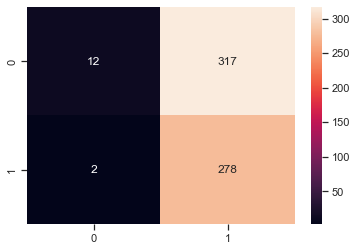

0.2 

Accuracy Score 0.5205
F1 Score 0.649 

Confusion Matrix


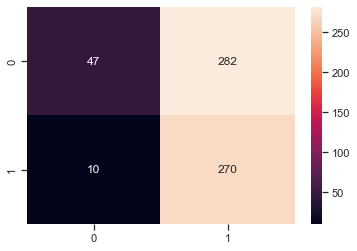

0.3 

Accuracy Score 0.6108
F1 Score 0.6784 

Confusion Matrix


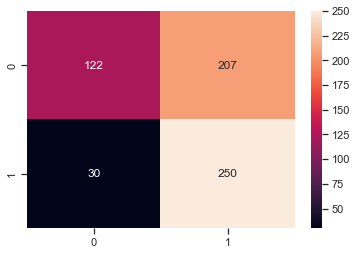

0.4 

Accuracy Score 0.67
F1 Score 0.67 

Confusion Matrix


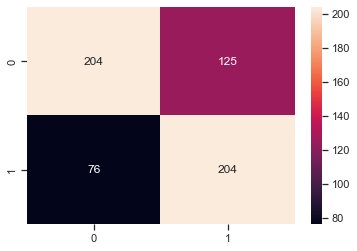

0.5 

Accuracy Score 0.6617
F1 Score 0.6054 

Confusion Matrix


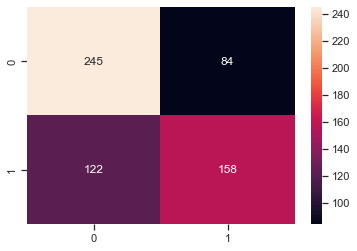

0.6 

Accuracy Score 0.6683
F1 Score 0.5491 

Confusion Matrix


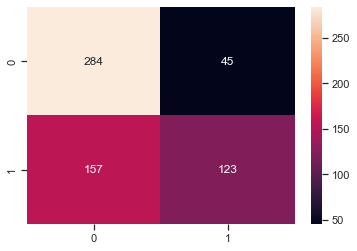

0.7 

Accuracy Score 0.6486
F1 Score 0.4398 

Confusion Matrix


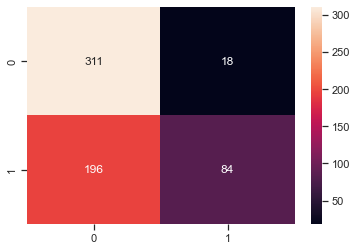

0.8 

Accuracy Score 0.5961
F1 Score 0.2215 

Confusion Matrix


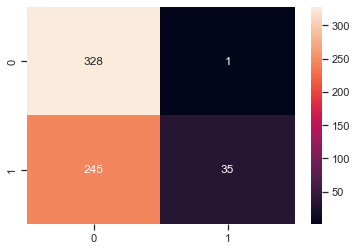

0.9 

Accuracy Score 0.5435
F1 Score 0.0142 

Confusion Matrix


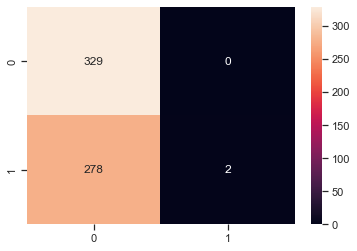

In [318]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

LDA - AUC for the Training Data: 0.737
LDA - AUC for the Test Data: 0.708


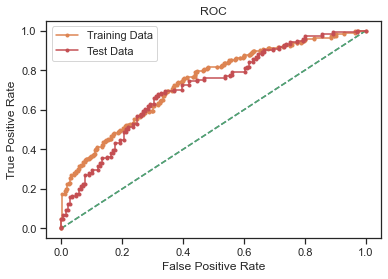

In [534]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('LDA - AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('LDA - AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [325]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.65
lda_train_recall  0.56
lda_train_f1  0.61


In [326]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.66
lda_test_recall  0.52
lda_test_f1  0.58


In [350]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66000,0.65000,0.66000,0.65000
AUC,0.74000,0.71000,0.74000,0.71000
Recall,0.56000,0.51000,0.56000,0.52000
Precision,0.65000,0.65000,0.65000,0.66000
F1 Score,0.61000,0.57000,0.61000,0.58000


In [381]:
hol.age.max()

62

In [495]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[0.66,0.73,0.56,0.65,0.61],
        'LR Test':[0.65,0.71,0.51,0.65,0.57],
       'LDA Train':[0.66,0.73,0.56,0.65,0.61],
        'LDA Test':[0.66,0.70,0.73,0.61,0.66],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66000,0.65000,0.66000,0.66000
AUC,0.73000,0.71000,0.73000,0.70000
Recall,0.56000,0.51000,0.56000,0.73000
Precision,0.65000,0.65000,0.65000,0.61000
F1 Score,0.61000,0.57000,0.61000,0.66000
